In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import pandas as pd
import warnings
warnings.filterwarnings("ignore") 

In [2]:
df=pd.read_csv("diabetic_data.csv")

In [3]:
df.shape

(101766, 50)

In [9]:
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [4]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [8]:
df['diag_1'].value_counts()

428    6862
414    6581
786    4016
410    3614
486    3508
       ... 
471       1
691       1
207       1
834       1
98        1
Name: diag_1, Length: 717, dtype: int64

In [5]:
df['time_in_hospital'].value_counts()

3     17756
2     17224
1     14208
4     13924
5      9966
6      7539
7      5859
8      4391
9      3002
10     2342
11     1855
12     1448
13     1210
14     1042
Name: time_in_hospital, dtype: int64

In [123]:
df['admission_type_id'].value_counts()

1    53990
3    18869
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: admission_type_id, dtype: int64

In [124]:
admission_type_mapping = {
    1: 'Emergency',
    2: 'Urgent',
    3: 'Elective',
    4: 'Newborn',
    5: 'Not Available',
    6: 'NULL',
    7: 'Trauma Center',
    8: 'Not Mapped'
}

In [125]:
df['admission_type_id'] = df['admission_type_id'].replace(admission_type_mapping)

In [126]:
df['admission_type_id'].value_counts()

Emergency        53990
Elective         18869
Urgent           18480
NULL              5291
Not Available     4785
Not Mapped         320
Trauma Center       21
Newborn             10
Name: admission_type_id, dtype: int64

In [127]:
df1=df.loc[~df['admission_type_id'].isin(['NULL','Not Available','Not Mapped'])]

In [128]:
df1['admission_type_id'].value_counts()

Emergency        53990
Elective         18869
Urgent           18480
Trauma Center       21
Newborn             10
Name: admission_type_id, dtype: int64

In [129]:
df1=df.loc[~df['discharge_disposition_id'].isin([11,13,14,19,18,20,21,25,26])]

In [130]:
disposition_mapping = {
    1: 'Discharged to home',
    2: 'transferred to another short-term hospital',
    3: 'transferred to SNF',
    4: 'transferred to ICF',
    5: 'transferred to another type of inpatient care institution',
    6: 'transferred to home with home health service',
    7: 'Left AMA',
    8: 'transferred to home under care of Home IV provider',
    9: 'Admitted as an inpatient to this hospital',
    10: 'discharged to another hospital for neonatal aftercare',
    
    12: 'Still patient or expected to return for outpatient services',
    15: 'transferred within this institution to Medicare approved swing bed',
    16: 'referred another institution for outpatient services',
    17: 'referred to this institution for outpatient services',
    
   
 
    22: 'transferred to another rehab fac including rehab units of a hospital .',
    23: 'transferred to a long term care hospital.',
    24: 'transferred to a nursing facility certified under Medicaid but not certified under Medicare.',
  

    30: 'transferred to another Type of Health Care Institution not Defined Elsewhere',
    27: 'transferred to a federal health care facility.',
    28: 'referred to a psychiatric hospital of psychiatric distinct part unit of a hospital',
    29: 'transferred to a Critical Access Hospital (CAH)'
}

In [131]:
df1['discharge_disposition_id'] = df['discharge_disposition_id'].replace(disposition_mapping)

In [132]:
df1['discharge_disposition_id'].value_counts()

Discharged to home                                                                              60234
transferred to SNF                                                                              13954
transferred to home with home health service                                                    12902
transferred to another short-term hospital                                                       2128
transferred to another rehab fac including rehab units of a hospital .                           1993
transferred to another type of inpatient care institution                                        1184
transferred to ICF                                                                                815
Left AMA                                                                                          623
transferred to a long term care hospital.                                                         412
referred to a psychiatric hospital of psychiatric distinct part unit of a hospital

In [133]:
df1.shape

(94663, 50)

In [134]:
df1['race'].value_counts()

Caucasian          70929
AfricanAmerican    17638
?                   2200
Hispanic            1882
Other               1404
Asian                610
Name: race, dtype: int64

In [135]:
df1['race'].mode()

0    Caucasian
dtype: object

In [136]:
df1['race']=df1['race'].replace({'?':'Americans'})

In [137]:
df1.drop(columns=['admission_source_id','payer_code','weight','encounter_id','patient_nbr','examide','citoglipton'],axis=1,inplace=True)

In [138]:
df1.shape

(94663, 43)

In [139]:
df1['age']=df1['age'].replace({'[0-10)':0,'[10-20)':10,'[20-30)':20,'[30-40)':30,'[40-50)':40,'[50-60)':50,'[60-70)':60,'[70-80)':70,'[80-90)':80,'[90-100)':90})

In [140]:
df1['age']

1         10
2         20
3         30
4         40
5         50
          ..
101761    70
101762    80
101763    70
101764    80
101765    70
Name: age, Length: 94663, dtype: int64

In [141]:
df1['medical_specialty']=df1['medical_specialty'].replace({'?':'Others'})

In [142]:
df['readmitted']=df['readmitted'].replace({'>30':1,'<30':1,'NO':0})
df1['readmitted']=df1['readmitted'].replace({'>30':1,'<30':1,'NO':0})

In [143]:
df1['readmitted'].value_counts()

0    49801
1    44862
Name: readmitted, dtype: int64

In [144]:
df1['admission_type_id']=df1['admission_type_id'].astype('object')
df1['discharge_disposition_id']=df1['discharge_disposition_id'].astype('object')
df1['age']=df1['age'].astype('object')

In [145]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94663 entries, 1 to 101765
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      94663 non-null  object
 1   gender                    94663 non-null  object
 2   age                       94663 non-null  object
 3   admission_type_id         94663 non-null  object
 4   discharge_disposition_id  94663 non-null  object
 5   time_in_hospital          94663 non-null  int64 
 6   medical_specialty         94663 non-null  object
 7   num_lab_procedures        94663 non-null  int64 
 8   num_procedures            94663 non-null  int64 
 9   num_medications           94663 non-null  int64 
 10  number_outpatient         94663 non-null  int64 
 11  number_emergency          94663 non-null  int64 
 12  number_inpatient          94663 non-null  int64 
 13  diag_1                    94663 non-null  object
 14  diag_2               

In [146]:
df1_num=df1.select_dtypes(include=np.number)
df1_num.columns

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'readmitted'],
      dtype='object')

In [147]:
for i in df1_num.columns:
    print(i,'------->',df1_num[i][df1_num[i] == '?'].count()/len(df1)*100)

time_in_hospital -------> 0.0
num_lab_procedures -------> 0.0
num_procedures -------> 0.0
num_medications -------> 0.0
number_outpatient -------> 0.0
number_emergency -------> 0.0
number_inpatient -------> 0.0
number_diagnoses -------> 0.0
readmitted -------> 0.0


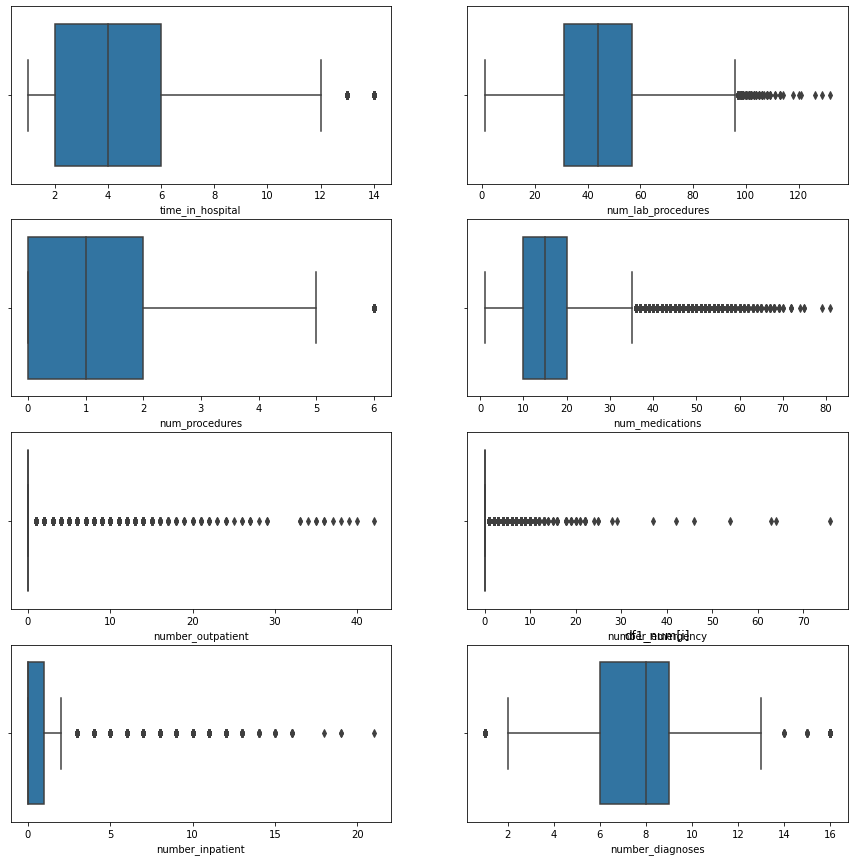

In [148]:
fig,ax=plt.subplots(4,2,figsize=(15,15))
for i,subplot in zip(df1_num,ax.flatten()):
    sns.boxplot(df1_num[i],ax=subplot)
    plt.title('df1_num[i]')
    
plt.show()

In [149]:
for i in df1_num.drop(columns=['number_outpatient','number_emergency'],axis=1).columns:
    q1=df1_num[i].quantile(0.25)
    q3=df1_num[i].quantile(0.75)
    iqr=q3-q1
    uw=q3+1.5*iqr
    lw=q1-1.5*iqr
    df1_num[i]=df1_num[i].apply(lambda x: uw if x>uw else lw if x<lw else x)

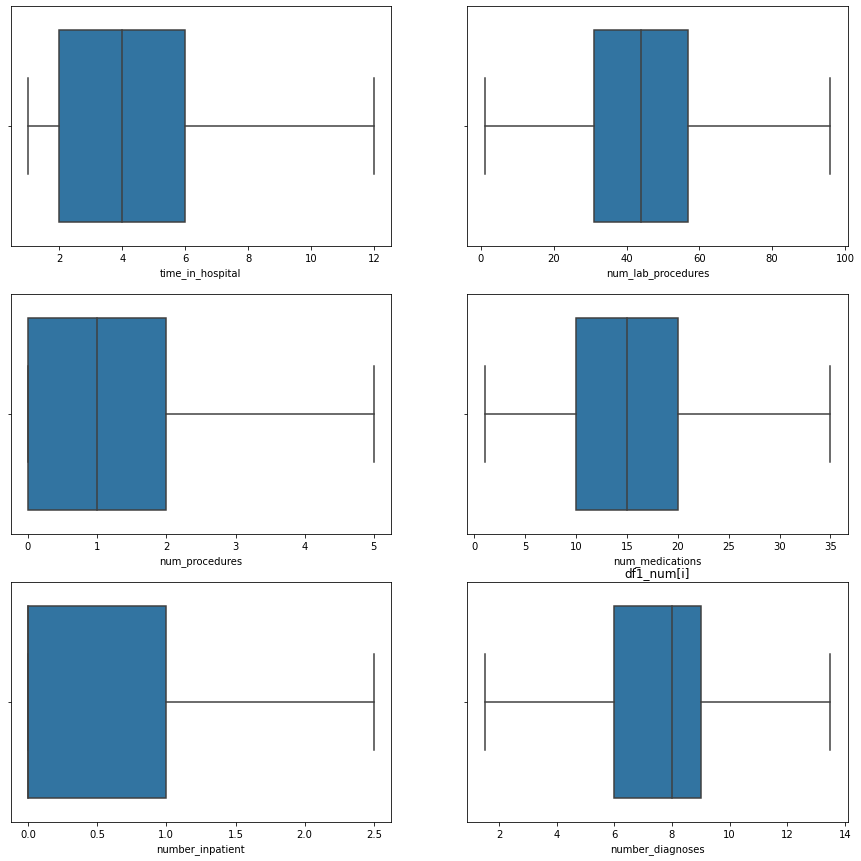

In [150]:
fig,ax=plt.subplots(3,2,figsize=(15,15))
for i,subplot in zip(df1_num.drop(columns=['number_outpatient','number_emergency'],axis=1).columns,ax.flatten()):
    sns.boxplot(df1_num[i],ax=subplot)
    plt.title('df1_num[i]')   
    
plt.show()

In [151]:
# UNIVARIATE

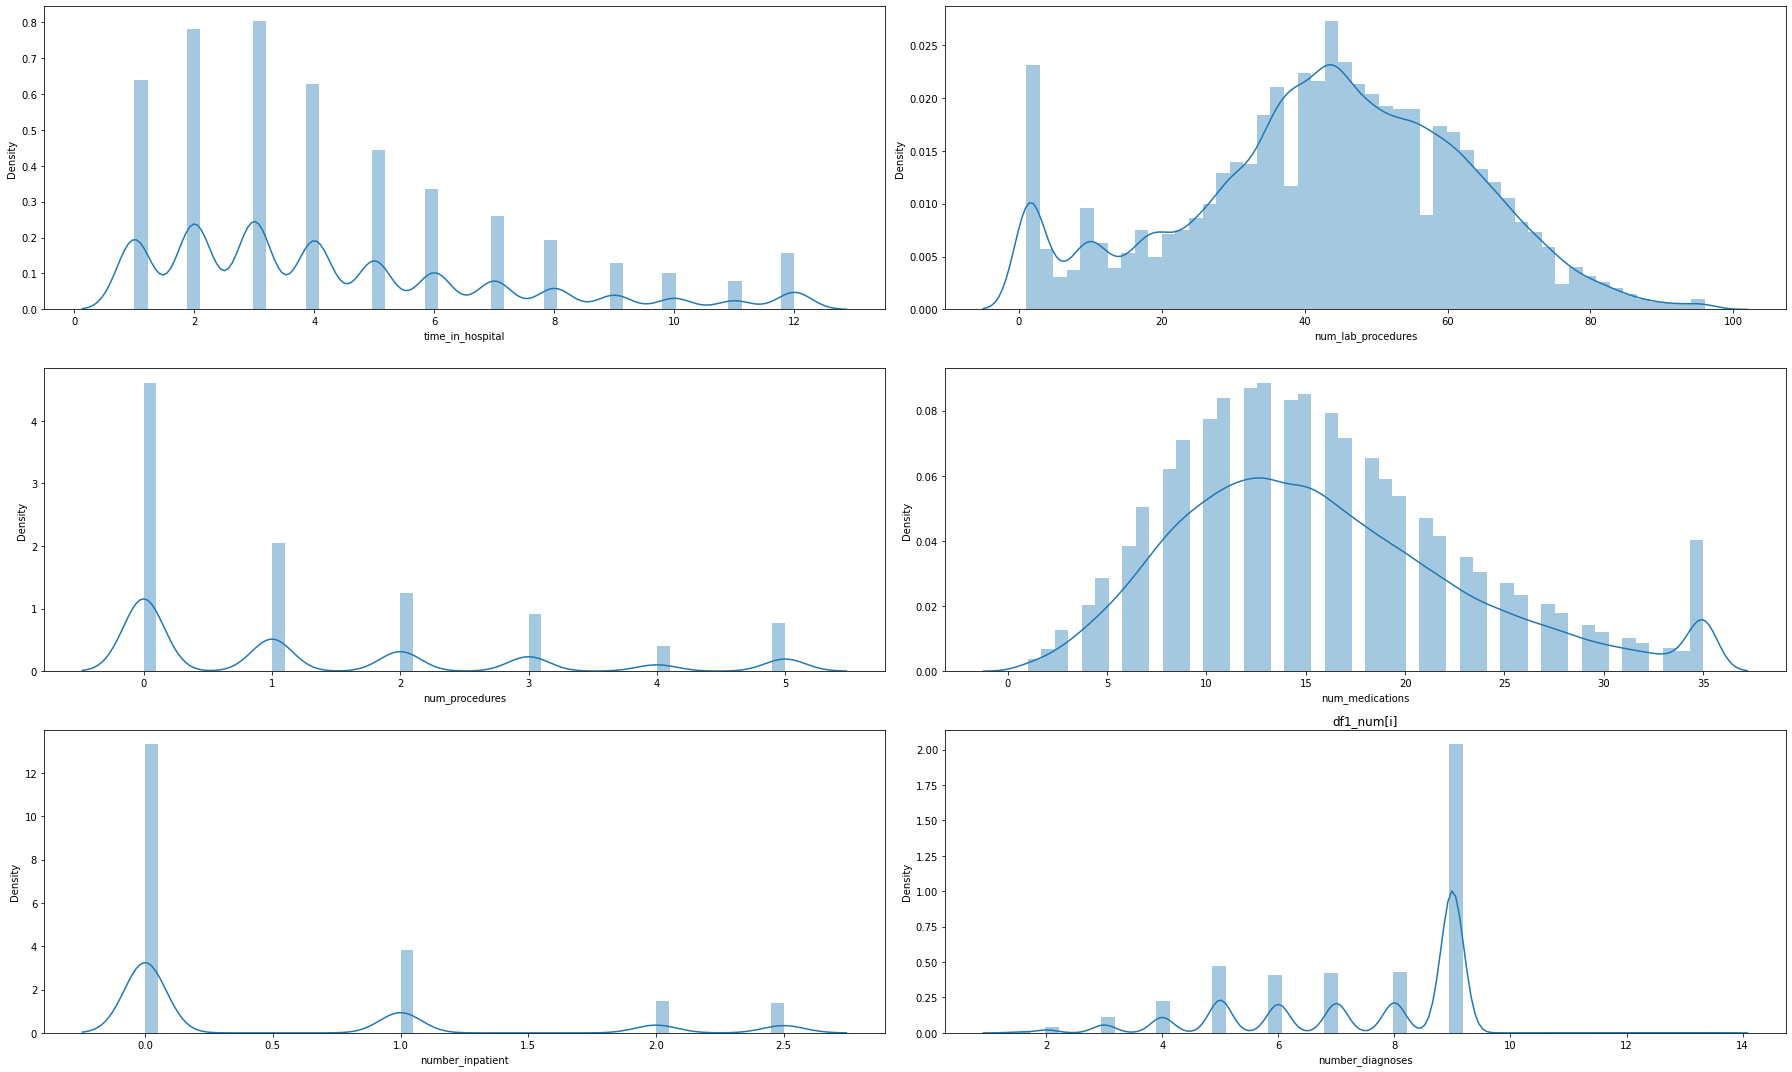

In [152]:
fig, ax= plt.subplots(3,2, figsize=(25,15))

for i, subplot in zip(df1_num.drop(columns=['number_outpatient','number_emergency'],axis=1).columns, ax.flatten()):
    sns.distplot(df1_num[i], ax=subplot)
    plt.title('df1_num[i]')

plt.tight_layout()
plt.show()

time_in_hospital


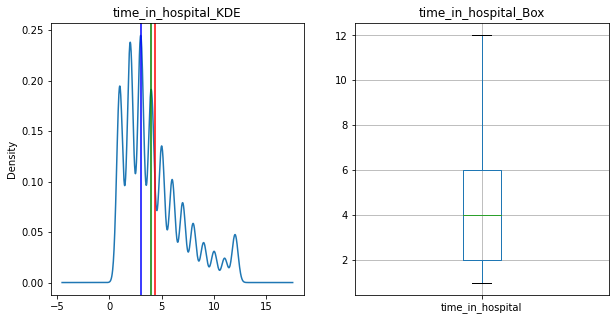

skewtime_in_hospital 1.0153703274497219
kurttime_in_hospital 0.3699631963515624
meantime_in_hospital 4.315962942226635
mediantime_in_hospital 4.0
modetime_in_hospital 3.0
stdtime_in_hospital 2.8599561432183522
vartime_in_hospital 8.179349141132391
num_lab_procedures


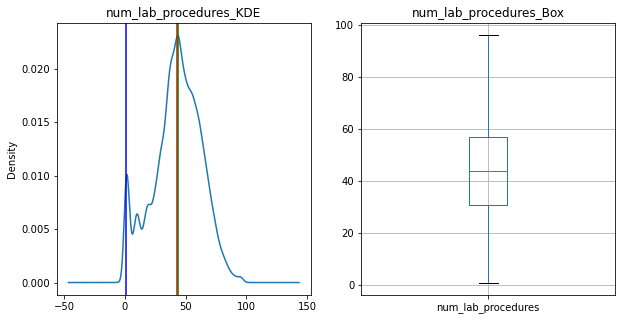

skewnum_lab_procedures -0.25697921127367646
kurtnum_lab_procedures -0.3017463684413362
meannum_lab_procedures 42.93465239850839
mediannum_lab_procedures 44.0
modenum_lab_procedures 1.0
stdnum_lab_procedures 19.723432074282883
varnum_lab_procedures 389.01377278885076
num_procedures


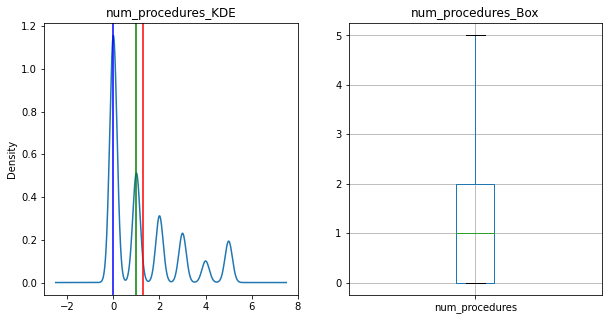

skewnum_procedures 1.1168867905793676
kurtnum_procedures 0.11982583975452465
meannum_procedures 1.2773311642352345
mediannum_procedures 1.0
modenum_procedures 0.0
stdnum_procedures 1.5737026250515183
varnum_procedures 2.4765399520940394
num_medications


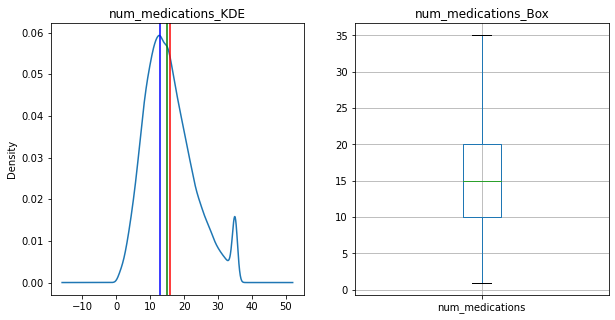

skewnum_medications 0.6623209964952027
kurtnum_medications 0.08720766553338954
meannum_medications 15.78373810253214
mediannum_medications 15.0
modenum_medications 13.0
stdnum_medications 7.339167102296081
varnum_medications 53.86337375542505
number_outpatient


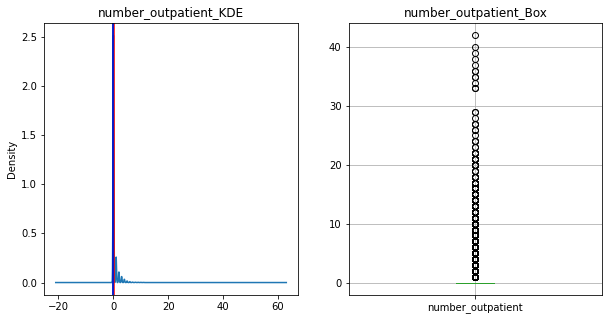

skewnumber_outpatient 8.732736993801876
kurtnumber_outpatient 145.07196869619779
meannumber_outpatient 0.3816168936120765
mediannumber_outpatient 0.0
modenumber_outpatient 0
stdnumber_outpatient 1.2878693093436018
varnumber_outpatient 1.6586073579491656
number_emergency


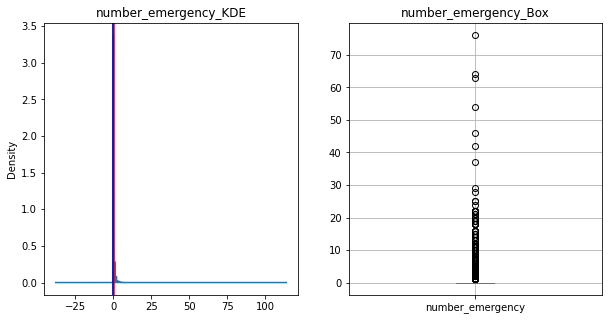

skewnumber_emergency 22.489297748623795
kurtnumber_emergency 1141.610928161801
meannumber_emergency 0.20594107518248947
mediannumber_emergency 0.0
modenumber_emergency 0
stdnumber_emergency 0.9574639524328689
varnumber_emergency 0.916737220208371
number_inpatient


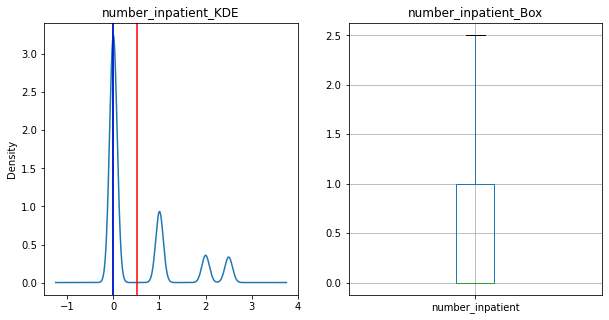

skewnumber_inpatient 1.3556433388264748
kurtnumber_inpatient 0.4879886195307783
meannumber_inpatient 0.5105004067058936
mediannumber_inpatient 0.0
modenumber_inpatient 0.0
stdnumber_inpatient 0.8091800636158206
varnumber_inpatient 0.6547723753533036
number_diagnoses


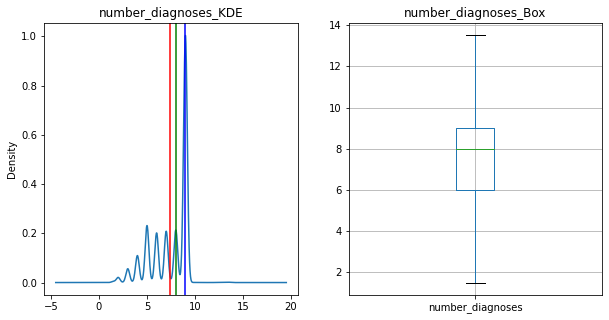

skewnumber_diagnoses -0.9077887301364204
kurtnumber_diagnoses -0.23010775513193193
meannumber_diagnoses 7.43273507072457
mediannumber_diagnoses 8.0
modenumber_diagnoses 9.0
stdnumber_diagnoses 1.9225662036820184
varnumber_diagnoses 3.696260807540288
readmitted


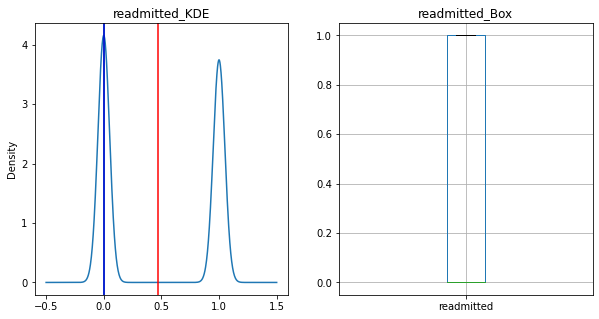

skewreadmitted 0.10449308727329282
kurtreadmitted -1.9891232205162377
meanreadmitted 0.47391272197162565
medianreadmitted 0.0
modereadmitted 0
stdreadmitted 0.49932162752178255
varreadmitted 0.24932208771100176


In [153]:
for i in df1_num.columns:
    print(i)
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    df1_num[i].plot(kind='kde')
    plt.axvline(df1_num[i].mean(),color='r')
    plt.axvline(df1_num[i].median(),color='g')
    plt.axvline(df1_num[i].mode()[0],color='b')
    plt.title(i+'_KDE')
    plt.subplot(1,2,2)
    plt.title(i+'_Box')
    df1_num[[i]].boxplot()
    plt.show()
    print('skew'+i,df1_num[i].skew())
    print('kurt'+i,df1_num[i].kurt())
    print('mean'+i,df1_num[i].mean())
    print('median'+i,df1_num[i].median())
    print('mode'+i,df1_num[i].mode()[0])
    print('std'+i,df1_num[i].std())
    print('var'+i,df1_num[i].var())

In [154]:
df1_cat=df1.select_dtypes(exclude=np.number)
df1_cat.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'medical_specialty', 'diag_1', 'diag_2',
       'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed'],
      dtype='object')

In [155]:
for i in df1_cat:
    print(i)
    print(df1_cat[i].value_counts())
    print('*****************************************')



race
Caucasian          70929
AfricanAmerican    17638
Americans           2200
Hispanic            1882
Other               1404
Asian                610
Name: race, dtype: int64
*****************************************
gender
Female             50957
Male               43703
Unknown/Invalid        3
Name: gender, dtype: int64
*****************************************
age
70    24006
60    20982
50    16228
80    15818
40     9114
30     3602
90     2503
20     1595
10      665
0       150
Name: age, dtype: int64
*****************************************
admission_type_id
Emergency        50217
Elective         17689
Urgent           17564
Not Available     4616
NULL              4231
Not Mapped         318
Trauma Center       18
Newborn             10
Name: admission_type_id, dtype: int64
*****************************************
discharge_disposition_id
Discharged to home                                                                              60234
transferred to SNF          

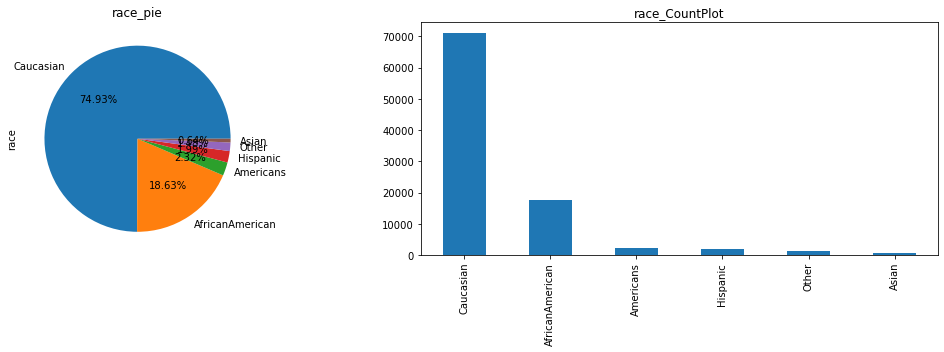

unique ['Caucasian' 'AfricanAmerican' 'Americans' 'Other' 'Hispanic' 'Asian']
mode 0    Caucasian
dtype: object
count of all sub categories Caucasian          70929
AfricanAmerican    17638
Americans           2200
Hispanic            1882
Other               1404
Asian                610
Name: race, dtype: int64


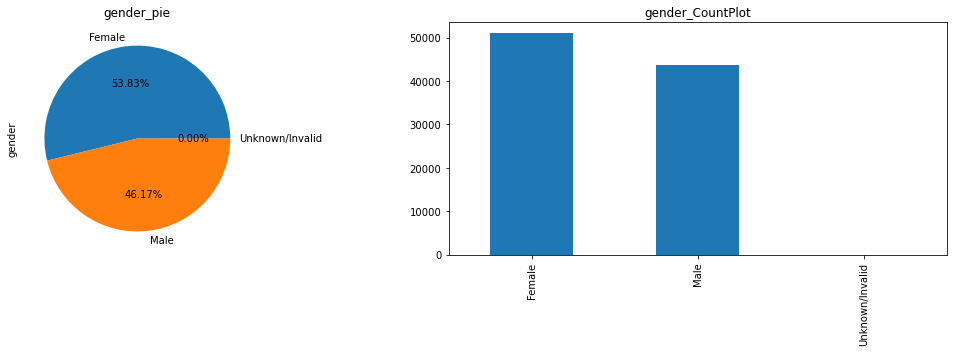

unique ['Female' 'Male' 'Unknown/Invalid']
mode 0    Female
dtype: object
count of all sub categories Female             50957
Male               43703
Unknown/Invalid        3
Name: gender, dtype: int64


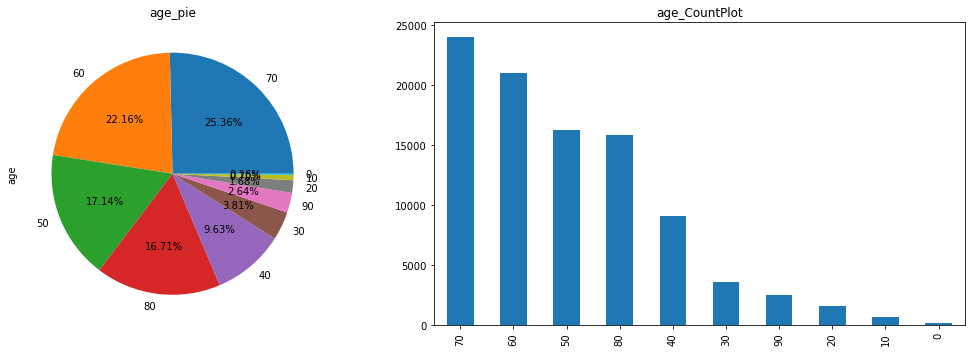

unique [10 20 30 40 50 60 70 80 90 0]
mode 0    70
dtype: object
count of all sub categories 70    24006
60    20982
50    16228
80    15818
40     9114
30     3602
90     2503
20     1595
10      665
0       150
Name: age, dtype: int64


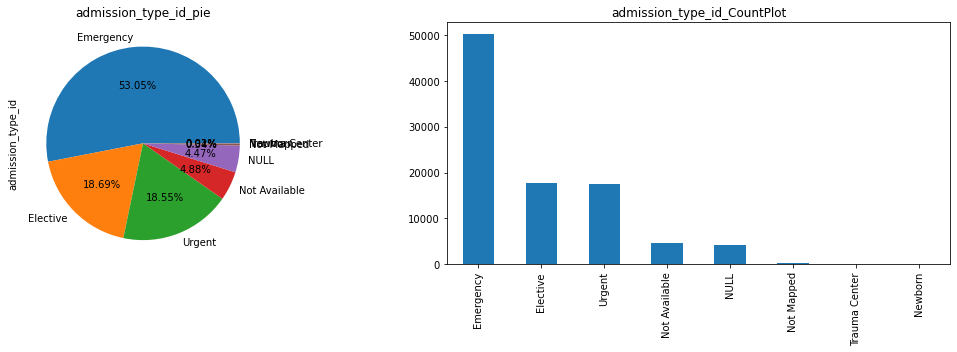

unique ['Emergency' 'Urgent' 'Elective' 'NULL' 'Newborn' 'Not Available'
 'Not Mapped' 'Trauma Center']
mode 0    Emergency
dtype: object
count of all sub categories Emergency        50217
Elective         17689
Urgent           17564
Not Available     4616
NULL              4231
Not Mapped         318
Trauma Center       18
Newborn             10
Name: admission_type_id, dtype: int64


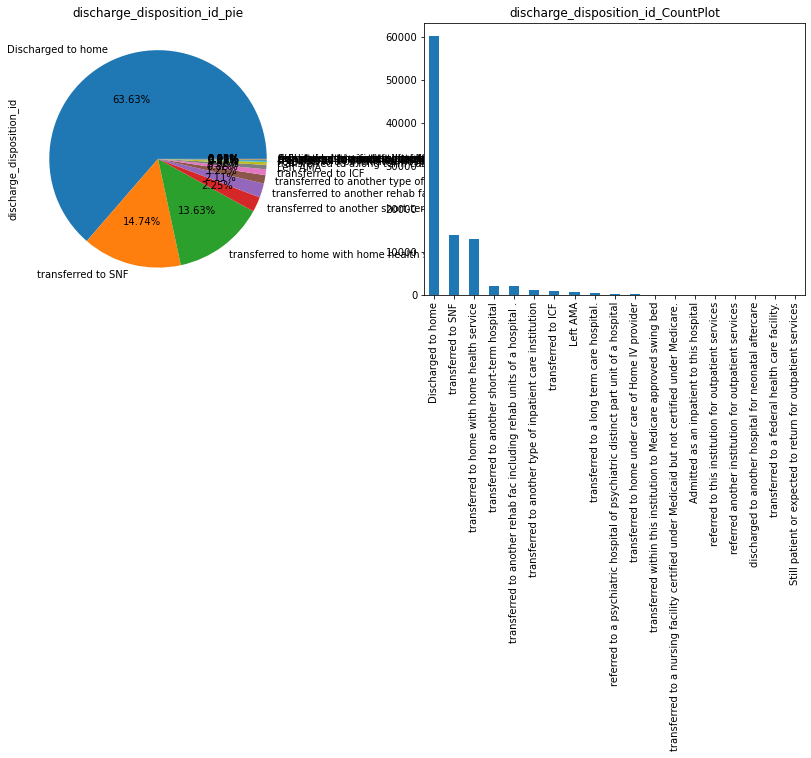

unique ['Discharged to home' 'transferred to SNF'
 'transferred to home with home health service'
 'transferred to another short-term hospital'
 'transferred to another type of inpatient care institution' 'Left AMA'
 'discharged to another hospital for neonatal aftercare'
 'transferred to ICF' 'transferred to home under care of Home IV provider'
 'Still patient or expected to return for outpatient services'
 'referred another institution for outpatient services'
 'referred to this institution for outpatient services'
 'transferred to another rehab fac including rehab units of a hospital .'
 'transferred to a long term care hospital.'
 'Admitted as an inpatient to this hospital'
 'transferred within this institution to Medicare approved swing bed'
 'transferred to a nursing facility certified under Medicaid but not certified under Medicare.'
 'referred to a psychiatric hospital of psychiatric distinct part unit of a hospital'
 'transferred to a federal health care facility.']
mode 0    

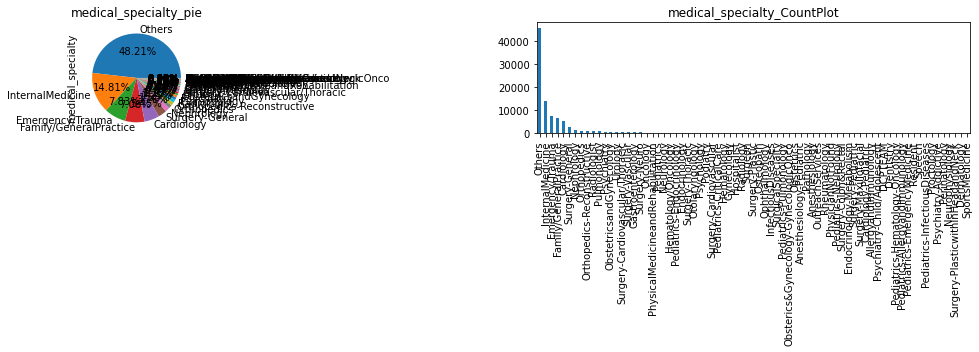

unique ['Others' 'InternalMedicine' 'Family/GeneralPractice' 'Cardiology'
 'Surgery-General' 'Orthopedics' 'Gastroenterology' 'Nephrology'
 'Psychiatry' 'Orthopedics-Reconstructive' 'Pulmonology' 'Surgery-Neuro'
 'Obsterics&Gynecology-GynecologicOnco' 'Pediatrics-CriticalCare'
 'Endocrinology' 'Urology' 'Radiology' 'Pediatrics-Endocrinology'
 'ObstetricsandGynecology' 'Pediatrics' 'Pediatrics-Hematology-Oncology'
 'Surgery-Cardiovascular/Thoracic' 'Anesthesiology-Pediatric'
 'Emergency/Trauma' 'Psychology' 'Neurology' 'Hematology/Oncology'
 'Psychiatry-Child/Adolescent' 'Surgery-Colon&Rectal' 'Podiatry'
 'Pediatrics-Pulmonology' 'Gynecology' 'Oncology' 'Pediatrics-Neurology'
 'Surgery-Plastic' 'Surgery-Thoracic' 'Surgery-PlasticwithinHeadandNeck'
 'Ophthalmology' 'Surgery-Pediatric' 'Pediatrics-EmergencyMedicine'
 'PhysicalMedicineandRehabilitation' 'Otolaryngology' 'InfectiousDiseases'
 'Anesthesiology' 'AllergyandImmunology' 'Surgery-Maxillofacial'
 'Pediatrics-InfectiousDiseases' 'P

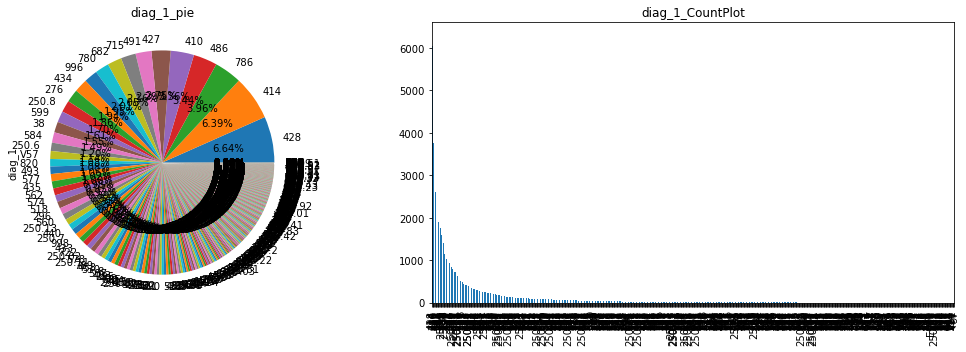

unique ['276' '648' '8' '197' '414' '428' '398' '434' '250.7' '157' '518' '999'
 '410' '682' '402' '737' '572' 'V57' '189' '786' '427' '996' '277' '584'
 '462' '473' '411' '174' '486' '998' '511' '626' '295' '196' '250.6' '618'
 '182' '845' '423' '808' '250.4' '722' '250.11' '784' '707' '440' '151'
 '715' '198' '564' '812' '997' '403' '38' '590' '556' '578' '250.32' '433'
 'V58' '569' '185' '536' '250.13' '599' '574' '491' '560' '188' '250.8'
 '332' '296' '250.02' '738' '593' '446' '250.41' '780' '250.22' '401'
 '724' '514' '435' '789' '162' '562' '711' '577' '553' '202' '349' '507'
 '386' '156' '200' '348' '607' '571' '288' '787' '530' '820' '220' '516'
 '210' '922' '286' '885' '661' '969' '824' '227' '404' '466' '191' '416'
 '535' '852' '250.82' '721' '457' '558' '250.03' '340' '?' '54' '351'
 '601' '723' '493' '555' '153' '443' '380' '211' '426' '733' '424' '596'
 '241' '218' '358' '694' '291' '331' '250.81' '282' '575' '345' '250.01'
 '453' '250.33' '681' '447' '290' '158' '579' 'V

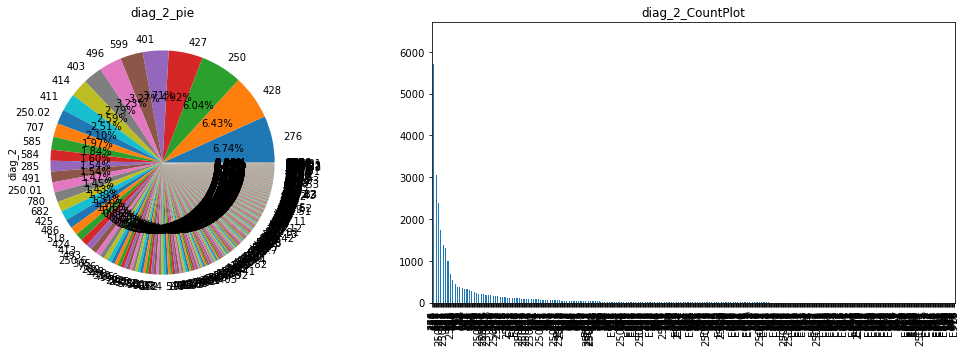

unique ['250.01' '250' '250.43' '157' '411' '492' '427' '198' '403' '288' '998'
 '507' '174' '425' '456' '401' '715' '496' '428' '585' '250.02' '410'
 '999' '996' '135' '244' '41' '571' '276' '599' '424' '491' '553' '707'
 '997' '286' '440' '493' '242' '70' 'V45' '250.03' '357' '?' '511' '196'
 '396' '197' '414' '250.52' '577' '535' '413' '285' '53' '780' '518' '150'
 '566' '250.6' 'V15' '581' '228' '786' '294' '8' '560' '277' '781'
 '250.42' 'V10' '153' '733' '426' '787' '305' '284' '759' '290' '250.13'
 '398' '203' '711' '446' '255' '788' '250.51' '162' '789' '200' '38' 'V42'
 '303' '486' '250.41' '117' '154' '847' '287' '729' '573' '250.11' '816'
 '648' '642' '416' '567' '412' '584' '785' '441' '250.7' '515' '300' '578'
 '790' '572' '250.83' '710' '250.82' '280' '283' '250.81' '536' '591'
 '292' '574' '595' '402' '530' '342' '682' '295' 'V12' '204' '466' '293'
 '569' '721' '434' '590' '271' '112' '368' '227' '482' '783' '250.5' '304'
 '576' '258' '253' '309' '250.91' '519' '458' '33

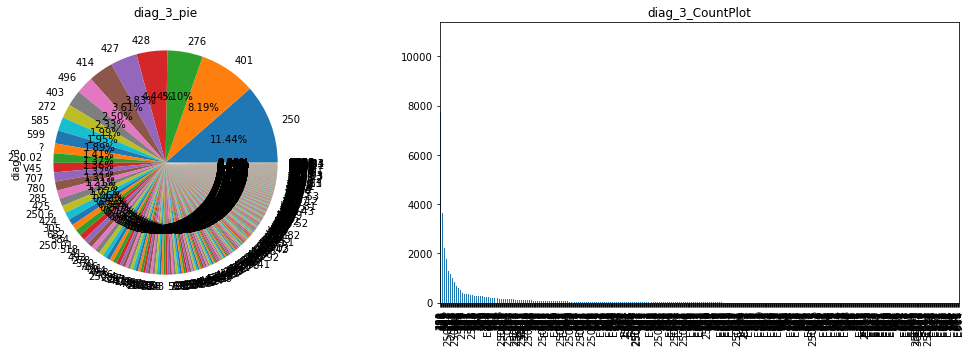

unique ['255' 'V27' '403' '250' 'V45' '38' '486' '996' '197' '250.6' '427' '627'
 '414' '416' '714' '428' '582' 'V43' '250.01' '263' '250.42' '276' '482'
 '401' '250.41' '585' '781' '278' '998' '568' '682' '618' '250.02' '305'
 '707' '496' '715' '?' '424' '518' '553' '794' '411' 'V42' '531' '511'
 '490' '562' '250.8' '599' '250.7' '491' '8' '724' '789' '999' '250.03'
 '753' '786' '529' '425' '595' '737' '625' 'V10' '244' '581' '493' '426'
 '272' '458' '413' '196' '473' '564' 'E932' '780' '294' '997' '459' '437'
 '397' '453' '331' '402' '533' '608' '285' '280' '593' '300' '287' '250.4'
 'E885' '571' '162' '198' '218' '303' '412' '396' 'V14' '784' '570' '433'
 'E934' '882' '648' '357' '577' '443' '584' '295' '281' '41' '153' '410'
 '304' '601' '598' '337' '722' '574' '805' '250.43' '653' 'V58' '507'
 '311' '386' '558' '578' '602' '785' '291' '790' '440' '112' '560' '620'
 '729' '535' '436' '70' '54' '296' '155' '138' '788' '362' '663' '530'
 '42' '342' '250.91' 'E884' '515' '307' '704' '

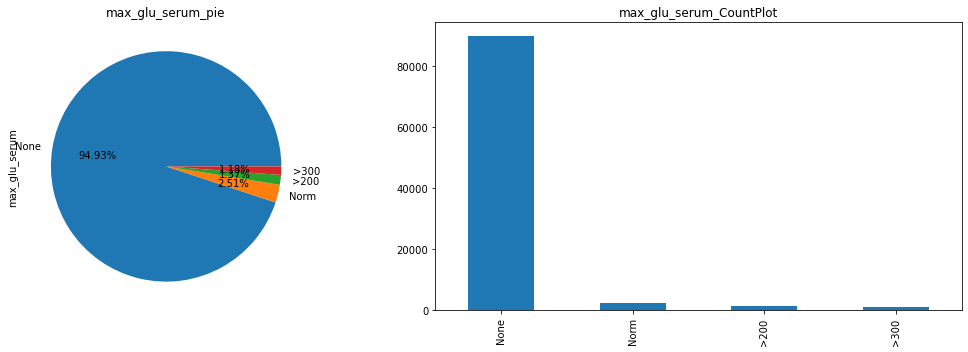

unique ['None' '>300' 'Norm' '>200']
mode 0    None
dtype: object
count of all sub categories None    89866
Norm     2378
>200     1298
>300     1121
Name: max_glu_serum, dtype: int64


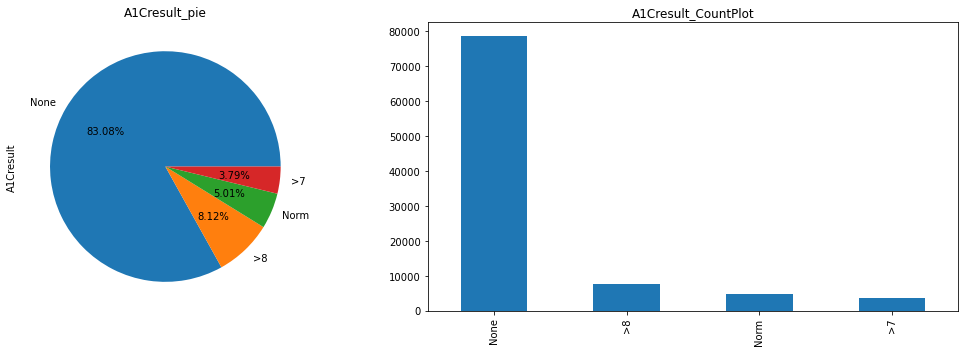

unique ['None' '>7' '>8' 'Norm']
mode 0    None
dtype: object
count of all sub categories None    78648
>8       7684
Norm     4744
>7       3587
Name: A1Cresult, dtype: int64


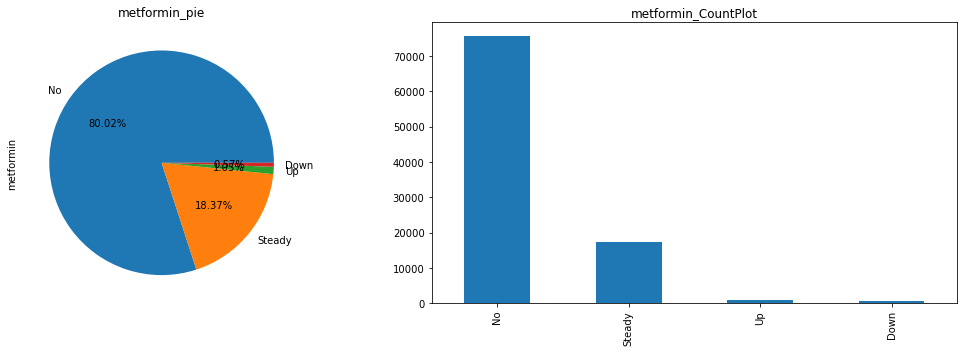

unique ['No' 'Steady' 'Up' 'Down']
mode 0    No
dtype: object
count of all sub categories No        75747
Steady    17385
Up          990
Down        541
Name: metformin, dtype: int64


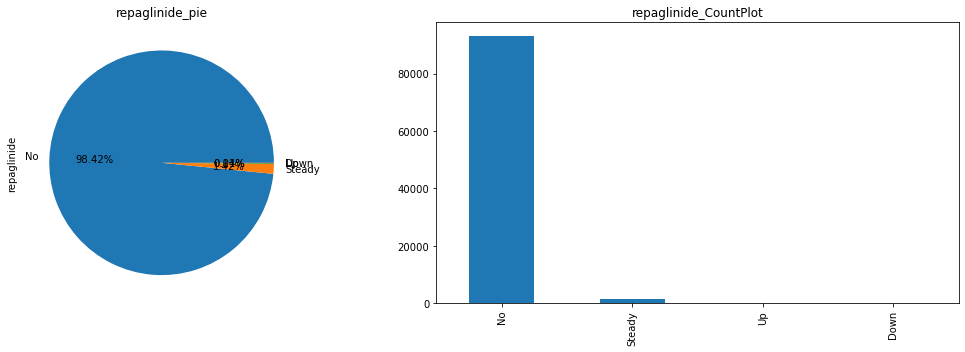

unique ['No' 'Up' 'Steady' 'Down']
mode 0    No
dtype: object
count of all sub categories No        93172
Steady     1344
Up          107
Down         40
Name: repaglinide, dtype: int64


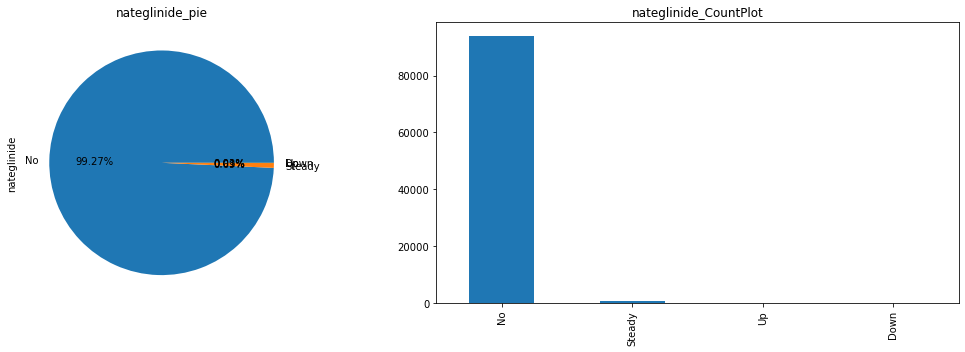

unique ['No' 'Steady' 'Down' 'Up']
mode 0    No
dtype: object
count of all sub categories No        93976
Steady      652
Up           24
Down         11
Name: nateglinide, dtype: int64


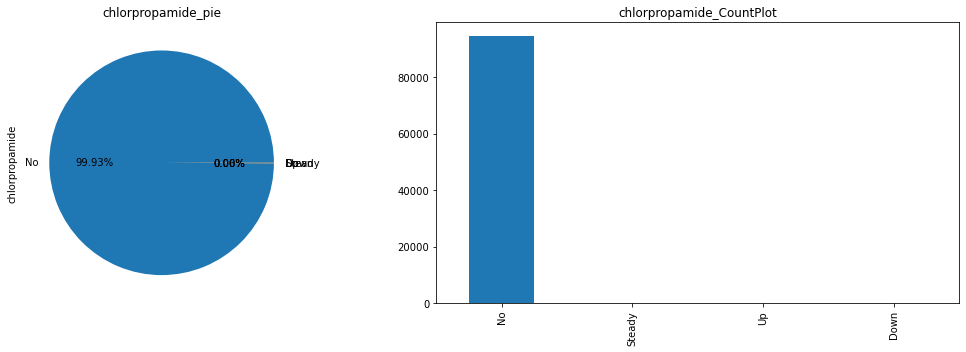

unique ['No' 'Steady' 'Down' 'Up']
mode 0    No
dtype: object
count of all sub categories No        94601
Steady       57
Up            4
Down          1
Name: chlorpropamide, dtype: int64


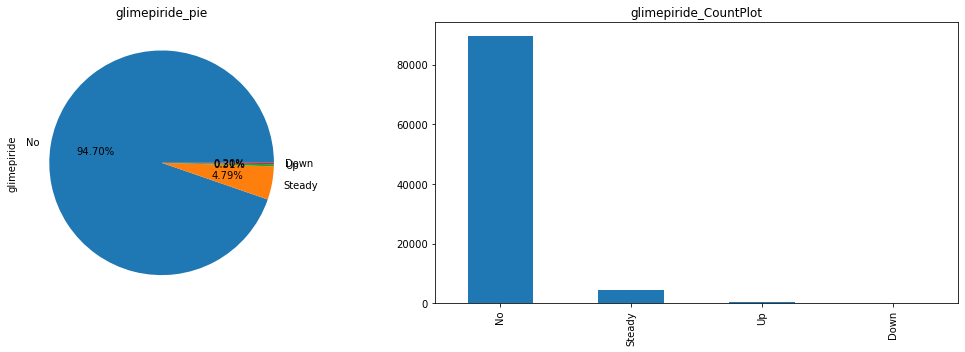

unique ['No' 'Steady' 'Up' 'Down']
mode 0    No
dtype: object
count of all sub categories No        89650
Steady     4531
Up          296
Down        186
Name: glimepiride, dtype: int64


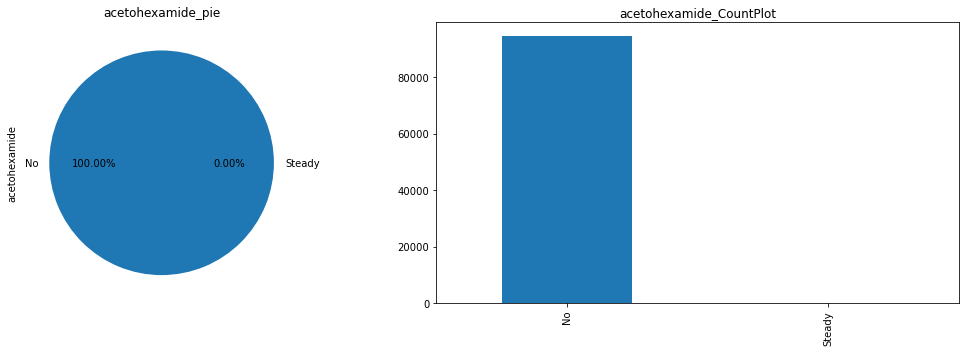

unique ['No' 'Steady']
mode 0    No
dtype: object
count of all sub categories No        94662
Steady        1
Name: acetohexamide, dtype: int64


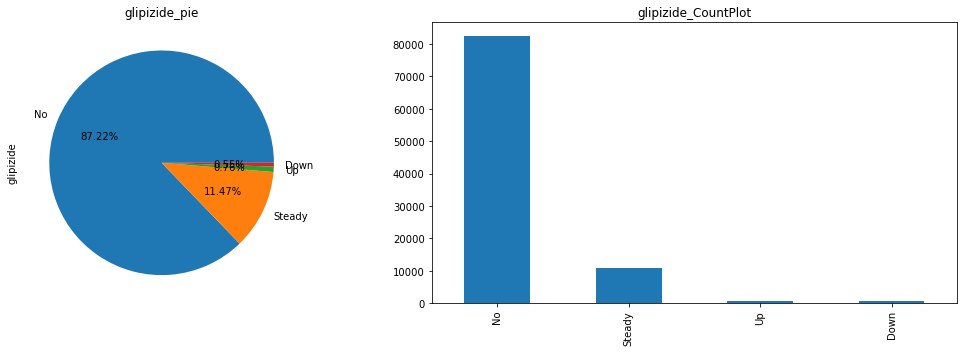

unique ['No' 'Steady' 'Up' 'Down']
mode 0    No
dtype: object
count of all sub categories No        82562
Steady    10860
Up          721
Down        520
Name: glipizide, dtype: int64


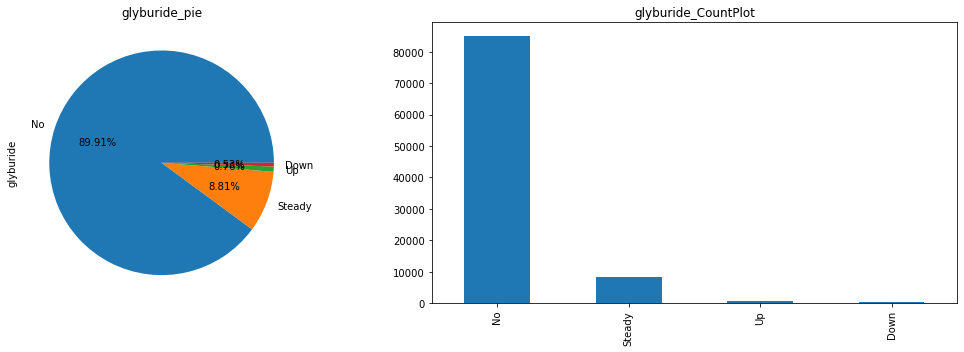

unique ['No' 'Steady' 'Up' 'Down']
mode 0    No
dtype: object
count of all sub categories No        85107
Steady     8341
Up          717
Down        498
Name: glyburide, dtype: int64


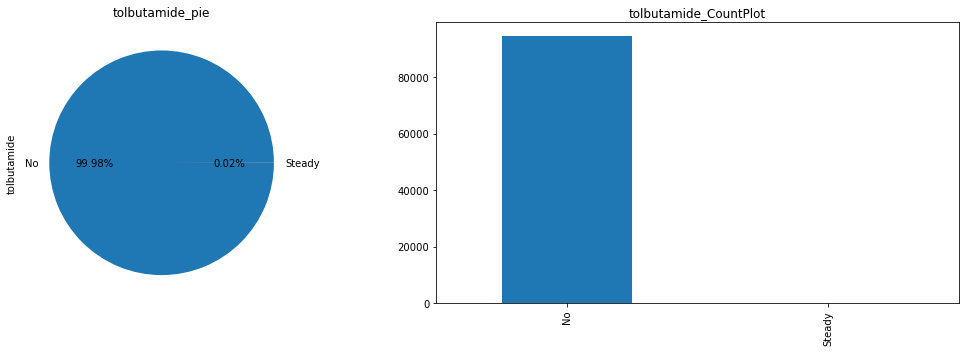

unique ['No' 'Steady']
mode 0    No
dtype: object
count of all sub categories No        94642
Steady       21
Name: tolbutamide, dtype: int64


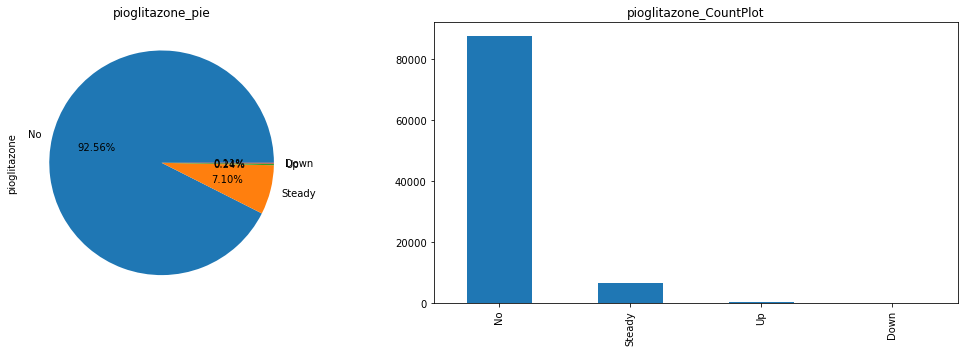

unique ['No' 'Up' 'Steady' 'Down']
mode 0    No
dtype: object
count of all sub categories No        87616
Steady     6717
Up          224
Down        106
Name: pioglitazone, dtype: int64


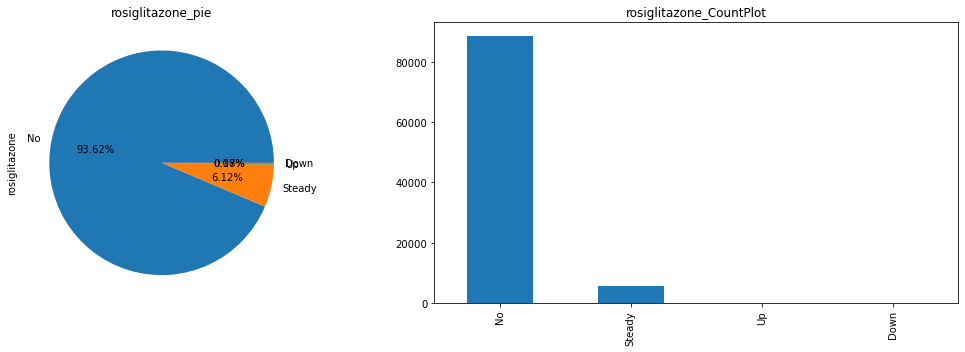

unique ['No' 'Steady' 'Up' 'Down']
mode 0    No
dtype: object
count of all sub categories No        88627
Steady     5795
Up          163
Down         78
Name: rosiglitazone, dtype: int64


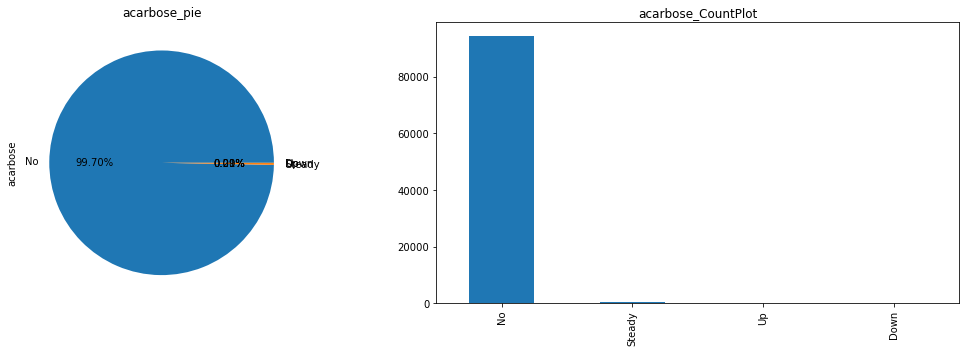

unique ['No' 'Steady' 'Up' 'Down']
mode 0    No
dtype: object
count of all sub categories No        94382
Steady      270
Up            8
Down          3
Name: acarbose, dtype: int64


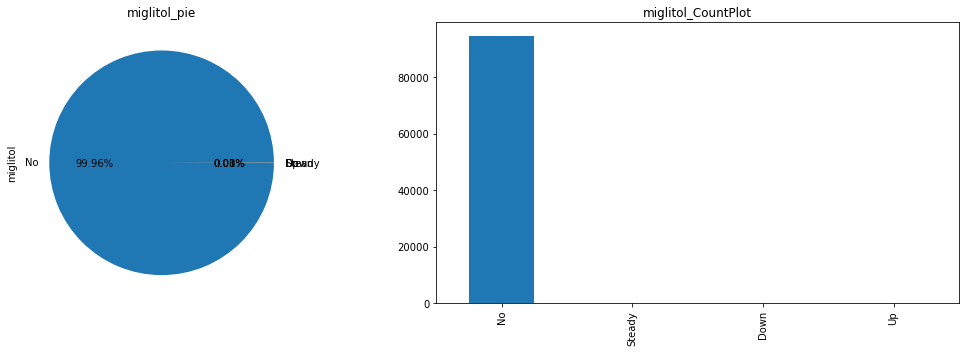

unique ['No' 'Steady' 'Down' 'Up']
mode 0    No
dtype: object
count of all sub categories No        94627
Steady       29
Down          5
Up            2
Name: miglitol, dtype: int64


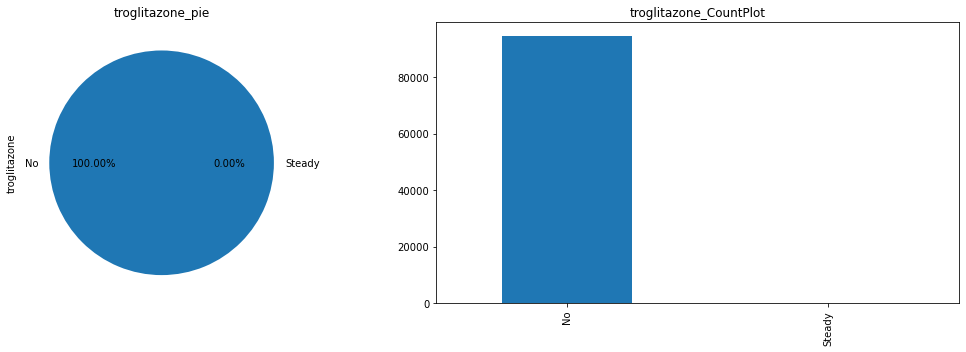

unique ['No' 'Steady']
mode 0    No
dtype: object
count of all sub categories No        94661
Steady        2
Name: troglitazone, dtype: int64


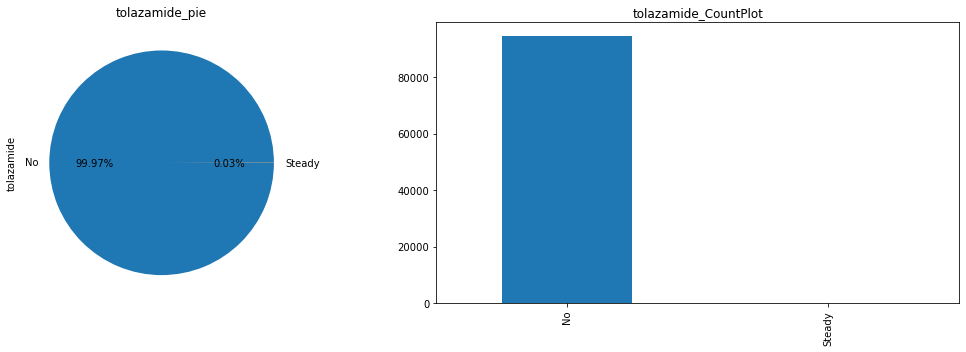

unique ['No' 'Steady']
mode 0    No
dtype: object
count of all sub categories No        94634
Steady       29
Name: tolazamide, dtype: int64


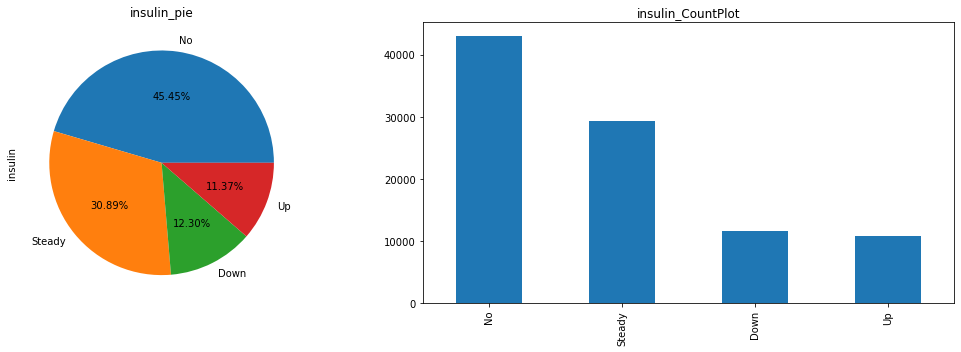

unique ['Up' 'No' 'Steady' 'Down']
mode 0    No
dtype: object
count of all sub categories No        43020
Steady    29241
Down      11639
Up        10763
Name: insulin, dtype: int64


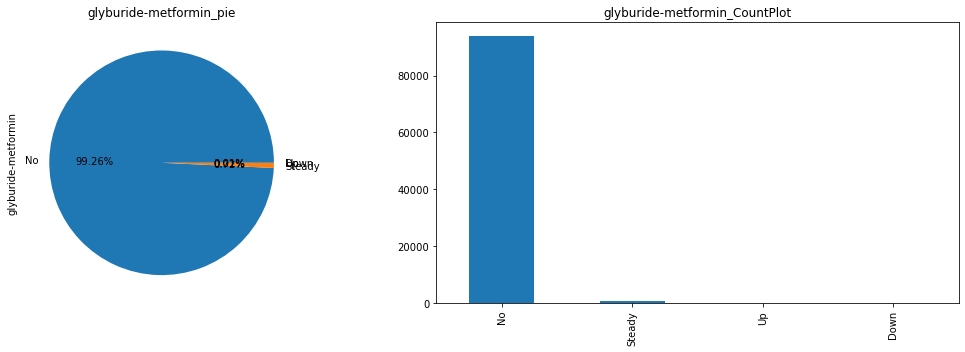

unique ['No' 'Steady' 'Down' 'Up']
mode 0    No
dtype: object
count of all sub categories No        93965
Steady      684
Up            8
Down          6
Name: glyburide-metformin, dtype: int64


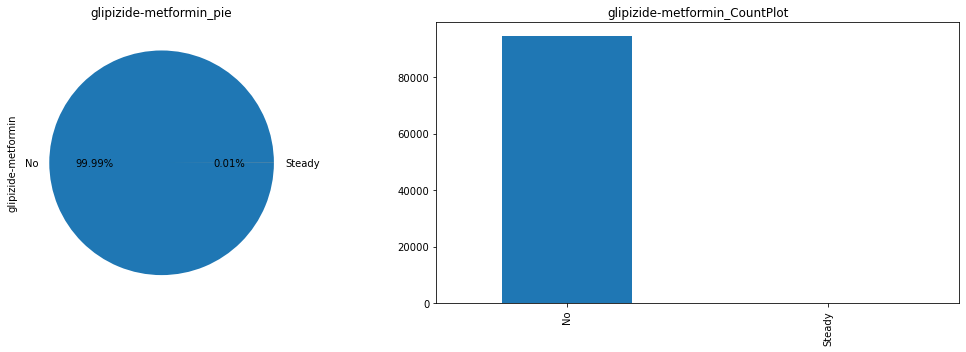

unique ['No' 'Steady']
mode 0    No
dtype: object
count of all sub categories No        94650
Steady       13
Name: glipizide-metformin, dtype: int64


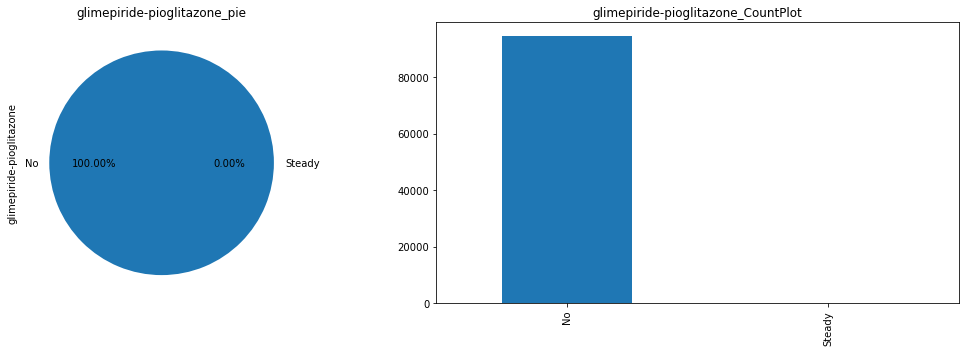

unique ['No' 'Steady']
mode 0    No
dtype: object
count of all sub categories No        94662
Steady        1
Name: glimepiride-pioglitazone, dtype: int64


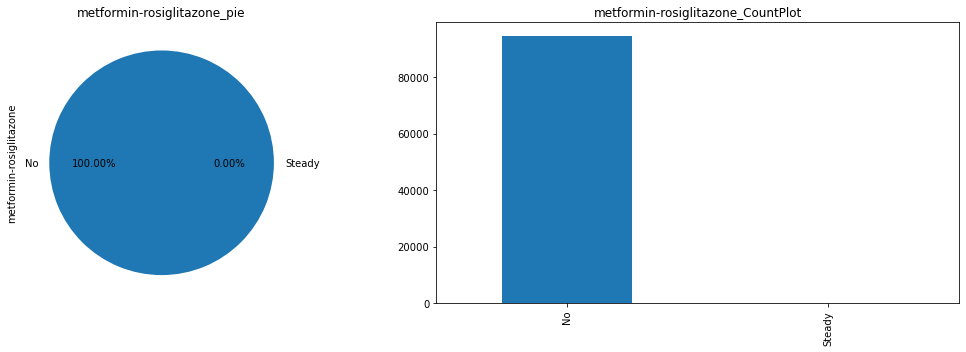

unique ['No' 'Steady']
mode 0    No
dtype: object
count of all sub categories No        94661
Steady        2
Name: metformin-rosiglitazone, dtype: int64


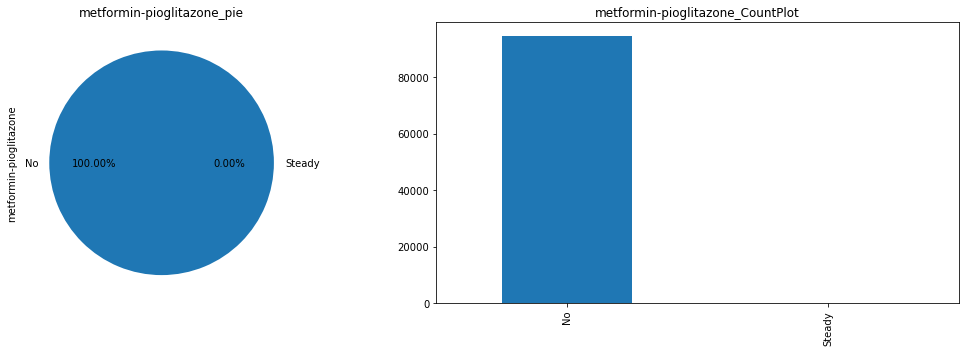

unique ['No' 'Steady']
mode 0    No
dtype: object
count of all sub categories No        94662
Steady        1
Name: metformin-pioglitazone, dtype: int64


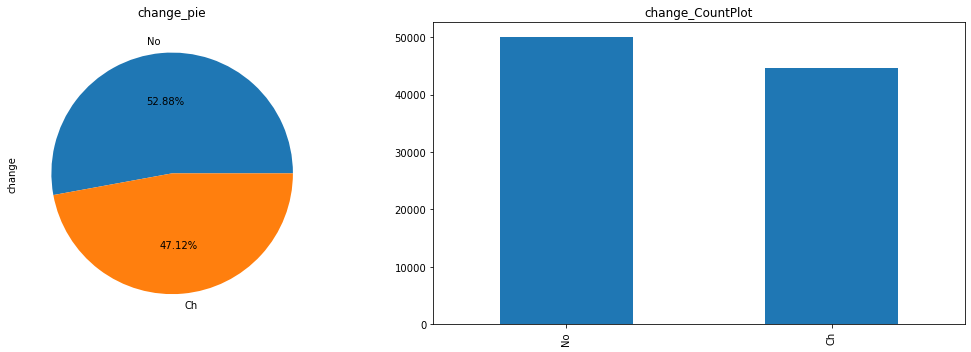

unique ['Ch' 'No']
mode 0    No
dtype: object
count of all sub categories No    50055
Ch    44608
Name: change, dtype: int64


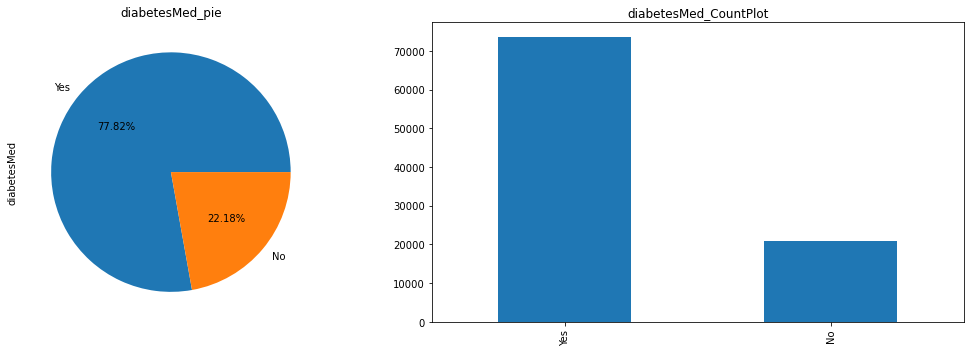

unique ['Yes' 'No']
mode 0    Yes
dtype: object
count of all sub categories Yes    73669
No     20994
Name: diabetesMed, dtype: int64


In [156]:
for i in df1_cat.select_dtypes(exclude=np.number):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.title(i+'_pie')
    df1_cat[i].value_counts().plot(kind='pie',autopct='%.2f%%')
    plt.subplot(1,2,2)
    plt.title(i+'_CountPlot')
    df1_cat[i].value_counts().plot(kind='bar')
    plt.tight_layout()
    plt.show()
    print('unique',df1_cat[i].unique())
    print('mode',df1_cat[i].mode())
    print('count of all sub categories',df1_cat[i].value_counts())

In [157]:
# BIVARIATE

In [158]:
# Examination and visualization of the effect of the target variable on insulin variable

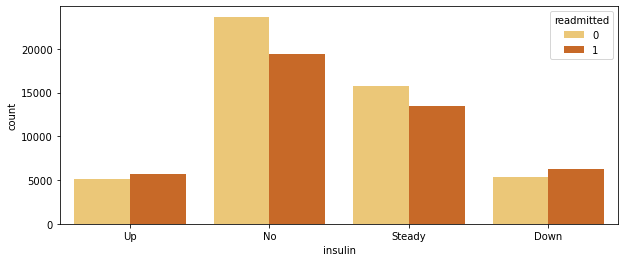

In [159]:
fig, ax =plt.subplots(figsize=(10,4))
sns.countplot(df1_cat['insulin'], hue=df1_num['readmitted'], palette="YlOrBr")
plt.show()

In [160]:
df1_cat['insulin'].value_counts()

No        43020
Steady    29241
Down      11639
Up        10763
Name: insulin, dtype: int64

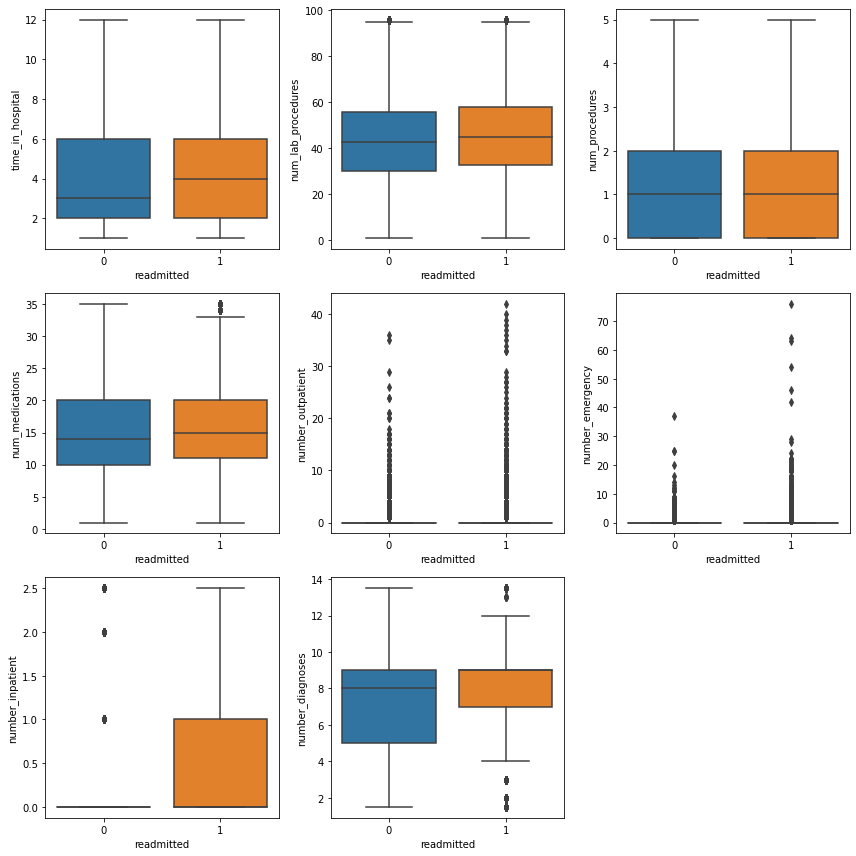

In [161]:
j=1
plt.rcParams['figure.figsize']=[12,12]
for i in df1_num.drop('readmitted',axis=1).columns:
    plt.subplot(3,3,j)
    sns.boxplot(x=df1_num['readmitted'],y=df1_num[i])
    j+=1
    plt.tight_layout()
plt.show()

In [162]:
len(df1_cat.columns)

34

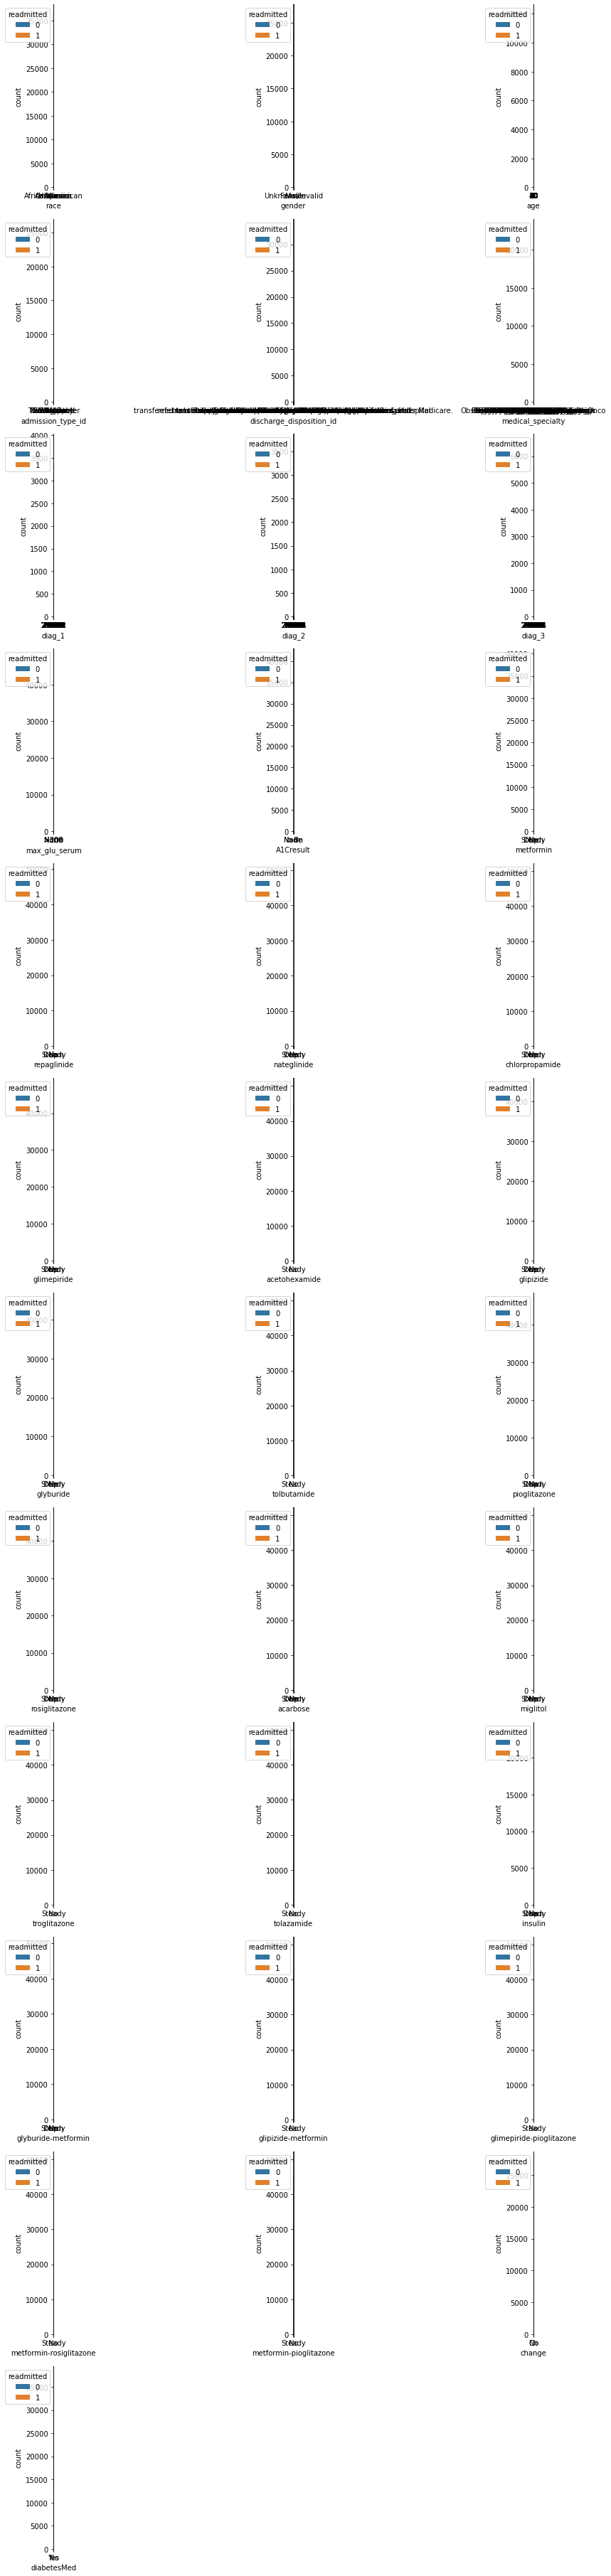

In [163]:
j=1
plt.rcParams['figure.figsize']=[12,50]
for i in df1_cat.columns:
    plt.subplot(12,3,j)
    sns.countplot(hue=df1_num['readmitted'],x=df1_cat[i])
    j+=1
    plt.tight_layout()
plt.show()

In [164]:
# MULTIVARIATE ANALYSIS

<AxesSubplot:>

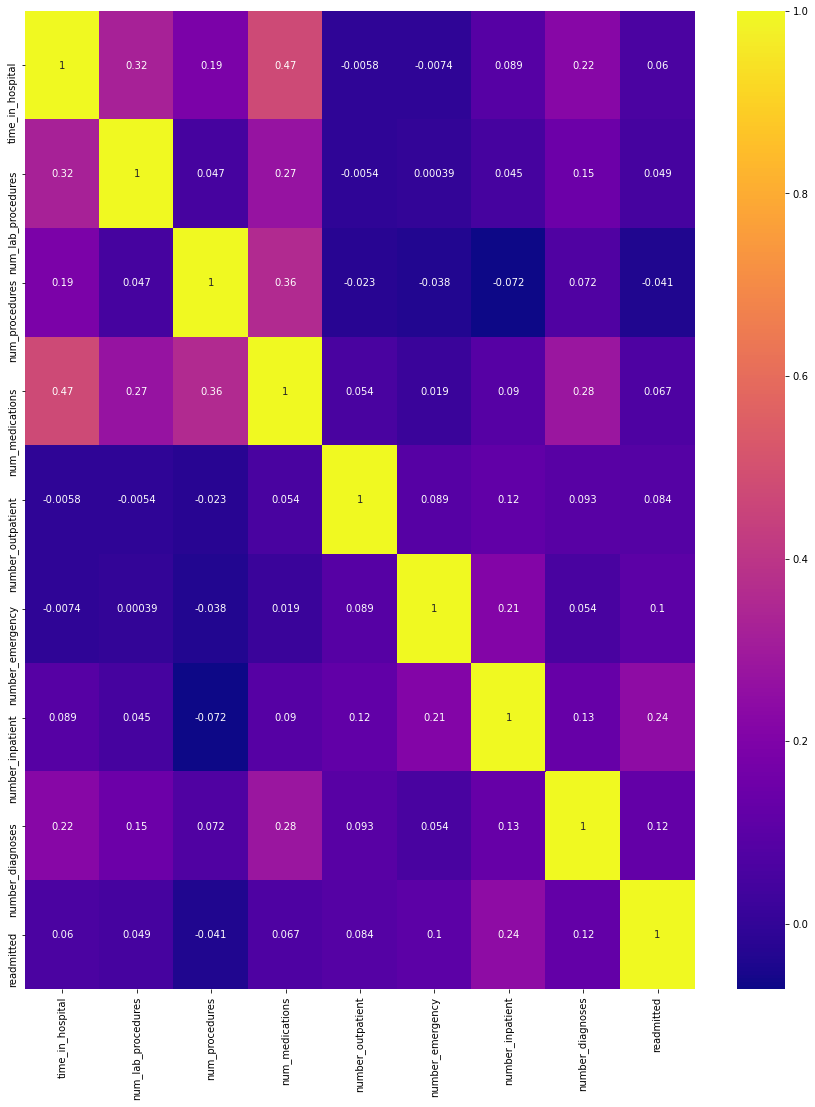

In [165]:
plt.figure(figsize=(15,18))
sns.heatmap(df1_num.corr(),annot=True,cmap='plasma')

In [166]:
# IMPUTING DIAG1,DIAG2, DIAG3 WITH ICD9 CODES

In [167]:
diag_list= ['diag_1','diag_2','diag_3'] 

In [168]:
df1_cat[df1_cat=='?'].count()

race                           0
gender                         0
age                            0
admission_type_id              0
discharge_disposition_id       0
medical_specialty              0
diag_1                        18
diag_2                       343
diag_3                      1339
max_glu_serum                  0
A1Cresult                      0
metformin                      0
repaglinide                    0
nateglinide                    0
chlorpropamide                 0
glimepiride                    0
acetohexamide                  0
glipizide                      0
glyburide                      0
tolbutamide                    0
pioglitazone                   0
rosiglitazone                  0
acarbose                       0
miglitol                       0
troglitazone                   0
tolazamide                     0
insulin                        0
glyburide-metformin            0
glipizide-metformin            0
glimepiride-pioglitazone       0
metformin-

In [169]:
df1_cat['diag_1']=df1_cat['diag_1'].replace({'?':np.nan})
df1_cat['diag_2']=df1_cat['diag_2'].replace({'?':np.nan})
df1_cat['diag_3']=df1_cat['diag_3'].replace({'?':np.nan})

In [170]:
df1_cat['diag_2'].isnull().sum()

343

In [171]:
for i in diag_list:
    df1_cat[i].fillna('NaN', inplace=True)

In [172]:
import re
def transformFunc(value):
    value = re.sub("V[0-9]*", "0", value) # V 
    value = re.sub("E[0-9]*", "0", value) # E 
    value = re.sub('NaN', "-1", value) # Nan 
    return value

def transformCategory(value):
    if value>=390 and value<=459 or value==785:
        category = 'Circulatory'
    elif value>=460 and value<=519 or value==786:
        category = 'Respiratory'
    elif value>=520 and value<=579 or value==787:
        category = 'Digestive'
    elif value==250:
        category = 'Diabetes'
    elif value>=800 and value<=999:
        category = 'Injury'          
    elif value>=710 and value<=739:
        category = 'Musculoskeletal'   
    elif value>=580 and value<=629 or value==788:
        category = 'Genitourinary'
    elif value>=140 and value<=239 :
        category = 'Neoplasms'
    elif value==-1:
        category = 'NAN'
    else :
        category = 'External Causes'

    return category

In [173]:
for col in diag_list:
    df1_cat[col] = df1_cat[col].apply(transformFunc)
    df1_cat[col] = df1_cat[col].astype(float)

In [174]:
for col in diag_list:
    df1_cat[col] = df1_cat[col].apply(transformCategory)

In [175]:
df1_cat['diag_3'].value_counts()

External Causes    32604
Circulatory        28120
Diabetes           10832
Respiratory         6693
Genitourinary       6171
Digestive           3680
Musculoskeletal     1816
Injury              1814
Neoplasms           1594
NAN                 1339
Name: diag_3, dtype: int64

In [176]:
df1_cat.head()

,race,gender,age,admission_type_id,discharge_disposition_id,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,...,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
1,Caucasian,Female,10,Emergency,Discharged to home,Others,External Causes,External Causes,External Causes,None,...,No,No,Up,No,No,No,No,No,Ch,Yes
2,AfricanAmerican,Female,20,Emergency,Discharged to home,Others,External Causes,Diabetes,External Causes,None,...,No,No,No,No,No,No,No,No,No,Yes
3,Caucasian,Male,30,Emergency,Discharged to home,Others,External Causes,External Causes,Circulatory,None,...,No,No,Up,No,No,No,No,No,Ch,Yes
4,Caucasian,Male,40,Emergency,Discharged to home,Others,Neoplasms,Neoplasms,Diabetes,None,...,No,No,Steady,No,No,No,No,No,Ch,Yes
5,Caucasian,Male,50,Urgent,Discharged to home,Others,Circulatory,Circulatory,Diabetes,None,...,No,No,Steady,No,No,No,No,No,No,Yes


In [177]:
df1_cat.shape

(94663, 34)

In [178]:
df1_num.shape

(94663, 9)

In [179]:
# Distribution of Diag_1, Diag_2 and Diag_3 Variables by Target Variable:¶

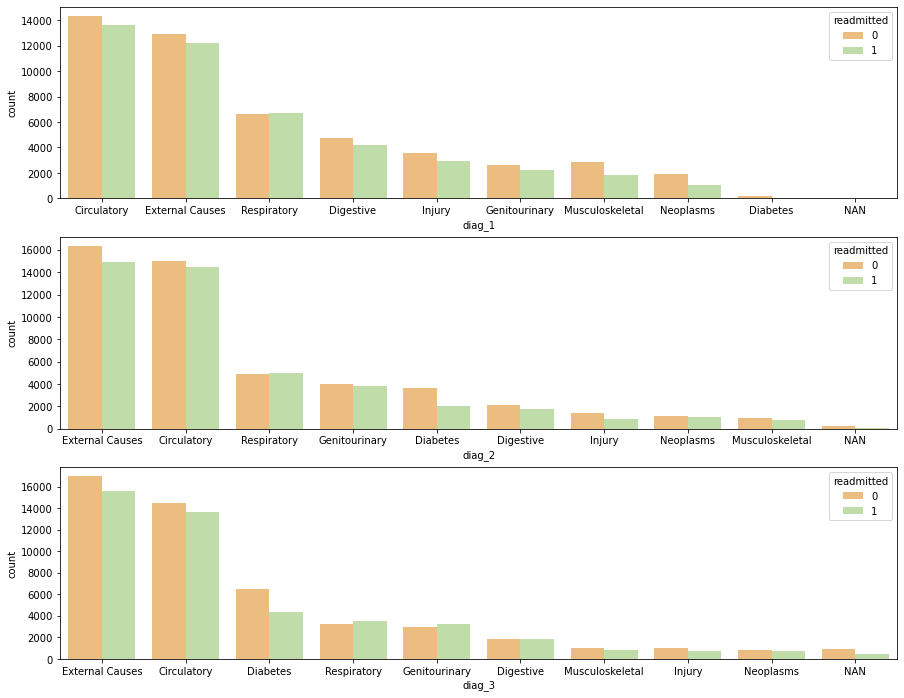

In [180]:
fig, ax =plt.subplots(nrows=3,ncols=1,figsize=(15,12))
count =0
for i in diag_list:
    sns.countplot(df1_cat[i], hue=df1_num['readmitted'], palette='Spectral', ax=ax[count], order = df1_cat[i].value_counts().index);
    count = count+1

In [181]:
# Examination and visualization of the effect of the target variable on insulin variable¶


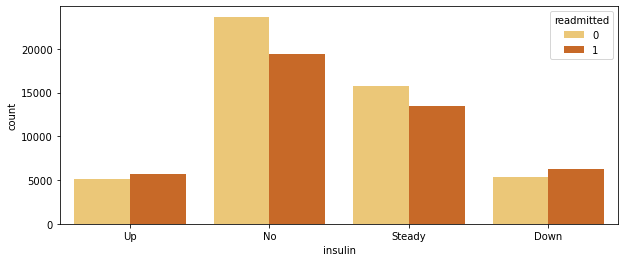

In [182]:
fig, ax =plt.subplots(figsize=(10,4))
sns.countplot(x=df1_cat['insulin'], hue=df1_num['readmitted'], palette="YlOrBr")
plt.show()

In [183]:
drugs = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
        'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone',
        'metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']

In [184]:
len(drugs)

21

In [185]:
# statistical tests for categorical variables

In [186]:
# CHI-SQUARE CONTIGENCY TEST

# The null and alternative hypothesis is:

# H0: diag_1 and readmitted are independent
# H1:  diag_1 and readmitted are not independent

In [187]:
from scipy.stats import chi2_contingency,chisquare
iv=[]
for i in df1_cat.columns:
    cs=pd.crosstab(df1_cat[i],df1['readmitted'])
    p=chi2_contingency(cs)[1]
    if p>=0.05:
        iv.append(i)

In [188]:
iv

['nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glyburide',
 'tolbutamide',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone']

In [189]:
# dropping the above drugs because they are proved as independent with the target variable

In [190]:
df1_cat.drop(columns=iv,axis=1,inplace=True)

In [191]:
df1_cat.head()

,race,gender,age,admission_type_id,discharge_disposition_id,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,metformin,repaglinide,glipizide,pioglitazone,rosiglitazone,acarbose,insulin,change,diabetesMed
1,Caucasian,Female,10,Emergency,Discharged to home,Others,External Causes,External Causes,External Causes,None,None,No,No,No,No,No,No,Up,Ch,Yes
2,AfricanAmerican,Female,20,Emergency,Discharged to home,Others,External Causes,Diabetes,External Causes,None,None,No,No,Steady,No,No,No,No,No,Yes
3,Caucasian,Male,30,Emergency,Discharged to home,Others,External Causes,External Causes,Circulatory,None,None,No,No,No,No,No,No,Up,Ch,Yes
4,Caucasian,Male,40,Emergency,Discharged to home,Others,Neoplasms,Neoplasms,Diabetes,None,None,No,No,Steady,No,No,No,Steady,Ch,Yes
5,Caucasian,Male,50,Urgent,Discharged to home,Others,Circulatory,Circulatory,Diabetes,None,None,No,No,No,No,No,No,Steady,No,Yes


In [192]:
df1_cat.shape

(94663, 20)

In [193]:
df1_num.shape

(94663, 9)

In [194]:
# statistical tests for numerical data

In [195]:
iv_num=[]
from scipy.stats import jarque_bera
from scipy.stats import levene,ttest_ind,mannwhitneyu
for i in df1_num.drop('readmitted',axis=1).columns:
    if jarque_bera(df1_num[i])[1]<0.05:
        if levene(df1_num[i],df1_num['readmitted'])[1]<0.05:
            if ttest_ind(df1_num[i],df1_num['readmitted'])[1]>0.05:
                iv_num.append(i)
        else:
            if mannwhitneyu(df1_num[i],df1_num['readmitted'])[1]>=0.05:
                iv_num.append(i)
    else:
        if mannwhitneyu(df1_num[i],df1_num['readmitted'])[1]>=0.05:
            iv_num.append(i)

In [196]:
df1_new=pd.concat([df1_cat,df1_num],axis=1)

In [197]:
df1_new

,race,gender,age,admission_type_id,discharge_disposition_id,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,...,diabetesMed,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted
1,Caucasian,Female,10,Emergency,Discharged to home,Others,External Causes,External Causes,External Causes,None,...,Yes,3.0,59.0,0.0,18.0,0,0,0.0,9.0,1
2,AfricanAmerican,Female,20,Emergency,Discharged to home,Others,External Causes,Diabetes,External Causes,None,...,Yes,2.0,11.0,5.0,13.0,2,0,1.0,6.0,0
3,Caucasian,Male,30,Emergency,Discharged to home,Others,External Causes,External Causes,Circulatory,None,...,Yes,2.0,44.0,1.0,16.0,0,0,0.0,7.0,0
4,Caucasian,Male,40,Emergency,Discharged to home,Others,Neoplasms,Neoplasms,Diabetes,None,...,Yes,1.0,51.0,0.0,8.0,0,0,0.0,5.0,0
5,Caucasian,Male,50,Urgent,Discharged to home,Others,Circulatory,Circulatory,Diabetes,None,...,Yes,3.0,31.0,5.0,16.0,0,0,0.0,9.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,70,Emergency,transferred to SNF,Others,External Causes,External Causes,Circulatory,None,...,Yes,3.0,51.0,0.0,16.0,0,0,0.0,9.0,1
101762,AfricanAmerican,Female,80,Emergency,transferred to ICF,Others,Digestive,External Causes,Digestive,None,...,Yes,5.0,33.0,3.0,18.0,0,0,1.0,9.0,0
101763,Caucasian,Male,70,Emergency,Discharged to home,Others,External Causes,Genitourinary,External Causes,None,...,Yes,1.0,53.0,0.0,9.0,1,0,0.0,13.0,0
101764,Caucasian,Female,80,Urgent,transferred to SNF,Surgery-General,Injury,External Causes,Injury,None,...,Yes,10.0,45.0,2.0,21.0,0,0,1.0,9.0,0


In [198]:
df1_new.shape

(94663, 29)

In [199]:
df1_new[df1_new=='?'].count()

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
medical_specialty           0
diag_1                      0
diag_2                      0
diag_3                      0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
glipizide                   0
pioglitazone                0
rosiglitazone               0
acarbose                    0
insulin                     0
change                      0
diabetesMed                 0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
number_diagnoses            0
readmitted                  0
dtype: int64

In [200]:
# df1_new['race']=df1_new['race'].replace({'?':'Americans'})

In [201]:
df1_new[df1_new=='NAN'].count()

race                           0
gender                         0
age                            0
admission_type_id              0
discharge_disposition_id       0
medical_specialty              0
diag_1                        18
diag_2                       343
diag_3                      1339
max_glu_serum                  0
A1Cresult                      0
metformin                      0
repaglinide                    0
glipizide                      0
pioglitazone                   0
rosiglitazone                  0
acarbose                       0
insulin                        0
change                         0
diabetesMed                    0
time_in_hospital               0
num_lab_procedures             0
num_procedures                 0
num_medications                0
number_outpatient              0
number_emergency               0
number_inpatient               0
number_diagnoses               0
readmitted                     0
dtype: int64

In [202]:
df1_new=df1_new.loc[~df1_new['diag_1'].isin(['NAN'])]
df1_new=df1_new.loc[~df1_new['diag_2'].isin(['NAN'])]
df1_new=df1_new.loc[~df1_new['diag_3'].isin(['NAN'])]

In [203]:
df1_new[df1_new=='NAN'].count()

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
medical_specialty           0
diag_1                      0
diag_2                      0
diag_3                      0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
glipizide                   0
pioglitazone                0
rosiglitazone               0
acarbose                    0
insulin                     0
change                      0
diabetesMed                 0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
number_diagnoses            0
readmitted                  0
dtype: int64

In [204]:
df1_new.shape

(93227, 29)

In [205]:
df1_new

,race,gender,age,admission_type_id,discharge_disposition_id,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,...,diabetesMed,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted
1,Caucasian,Female,10,Emergency,Discharged to home,Others,External Causes,External Causes,External Causes,None,...,Yes,3.0,59.0,0.0,18.0,0,0,0.0,9.0,1
2,AfricanAmerican,Female,20,Emergency,Discharged to home,Others,External Causes,Diabetes,External Causes,None,...,Yes,2.0,11.0,5.0,13.0,2,0,1.0,6.0,0
3,Caucasian,Male,30,Emergency,Discharged to home,Others,External Causes,External Causes,Circulatory,None,...,Yes,2.0,44.0,1.0,16.0,0,0,0.0,7.0,0
4,Caucasian,Male,40,Emergency,Discharged to home,Others,Neoplasms,Neoplasms,Diabetes,None,...,Yes,1.0,51.0,0.0,8.0,0,0,0.0,5.0,0
5,Caucasian,Male,50,Urgent,Discharged to home,Others,Circulatory,Circulatory,Diabetes,None,...,Yes,3.0,31.0,5.0,16.0,0,0,0.0,9.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,70,Emergency,transferred to SNF,Others,External Causes,External Causes,Circulatory,None,...,Yes,3.0,51.0,0.0,16.0,0,0,0.0,9.0,1
101762,AfricanAmerican,Female,80,Emergency,transferred to ICF,Others,Digestive,External Causes,Digestive,None,...,Yes,5.0,33.0,3.0,18.0,0,0,1.0,9.0,0
101763,Caucasian,Male,70,Emergency,Discharged to home,Others,External Causes,Genitourinary,External Causes,None,...,Yes,1.0,53.0,0.0,9.0,1,0,0.0,13.0,0
101764,Caucasian,Female,80,Urgent,transferred to SNF,Surgery-General,Injury,External Causes,Injury,None,...,Yes,10.0,45.0,2.0,21.0,0,0,1.0,9.0,0


In [206]:
# scaling and transform

In [207]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
for i in df1_new.select_dtypes('number').drop('readmitted',axis=1):
    df1_new[i]=ss.fit_transform(df1_new[[i]])

In [208]:
# from sklearn.preprocessing import StandardScaler
# ss=StandardScaler()
# for i in xtrain.select_dtypes('number').columns:
#     xtrain[i]= ss.fit_transform(xtrain[[i]])
#     xtest[i]= ss.transform(xtest[[i]])

In [209]:
# from sklearn.preprocessing import PowerTransformer
# pt=PowerTransformer()
# for i in xtrain.select_dtypes('number').columns:
#     xtrain[i]=pt.fit_transform(xtrain[[i]])
#     xtest[[i]]=pt.fit_transform(xtest[[i]])

In [210]:
from sklearn.preprocessing import PowerTransformer


In [211]:

pt=PowerTransformer()
for i in df1_new.select_dtypes('number').drop('readmitted',axis=1):
    df1_new[i]=pt.fit_transform(df1_new[[i]])

In [212]:
df1_new

,race,gender,age,admission_type_id,discharge_disposition_id,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,...,diabetesMed,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted
1,Caucasian,Female,10,Emergency,Discharged to home,Others,External Causes,External Causes,External Causes,None,...,Yes,-0.326052,0.801073,-0.986680,0.434683,-0.454132,-0.363072,-0.706275,0.883014,1
2,AfricanAmerican,Female,20,Emergency,Discharged to home,Others,External Causes,Diabetes,External Causes,None,...,Yes,-0.888297,-1.543837,1.698940,-0.288198,2.247158,-0.363072,1.213244,-1.009060,0
3,Caucasian,Male,30,Emergency,Discharged to home,Others,External Causes,External Causes,Circulatory,None,...,Yes,-0.888297,-0.010105,0.190809,0.168041,-0.454132,-0.363072,-0.706275,-0.597348,0
4,Caucasian,Male,40,Emergency,Discharged to home,Others,Neoplasms,Neoplasms,Diabetes,None,...,Yes,-1.541191,0.359079,-0.986680,-1.181324,-0.454132,-0.363072,-0.706275,-1.323601,0
5,Caucasian,Male,50,Urgent,Discharged to home,Others,Circulatory,Circulatory,Diabetes,None,...,Yes,-0.326052,-0.646336,1.698940,0.168041,-0.454132,-0.363072,-0.706275,0.883014,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,70,Emergency,transferred to SNF,Others,External Causes,External Causes,Circulatory,None,...,Yes,-0.326052,0.359079,-0.986680,0.168041,-0.454132,-0.363072,-0.706275,0.883014,1
101762,AfricanAmerican,Female,80,Emergency,transferred to ICF,Others,Digestive,External Causes,Digestive,None,...,Yes,0.509984,-0.551924,1.228133,0.434683,-0.454132,-0.363072,1.213244,0.883014,0
101763,Caucasian,Male,70,Emergency,Discharged to home,Others,External Causes,Genitourinary,External Causes,None,...,Yes,-1.541191,0.467745,-0.986680,-0.990915,2.148444,-0.363072,-0.706275,6.997762,0
101764,Caucasian,Female,80,Urgent,transferred to SNF,Surgery-General,Injury,External Causes,Injury,None,...,Yes,1.633005,0.041476,0.843920,0.792966,-0.454132,-0.363072,1.213244,0.883014,0


In [213]:
df1_new.select_dtypes('object').columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'medical_specialty', 'diag_1', 'diag_2',
       'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide',
       'glipizide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'insulin',
       'change', 'diabetesMed'],
      dtype='object')

In [214]:
df1_new.select_dtypes('number').columns

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'readmitted'],
      dtype='object')

In [216]:
# df1_new_encoded= pd.get_dummies(df1_new.select_dtypes('object'), columns=df1_new.select_dtypes('object').columns,drop_first=True)

In [217]:
# # One hot Encoding Race and Id's 
# one_hot_data = pd.get_dummies(df1_new.select_dtypes('object'), columns=df1_new.select_dtypes('object').columns)

# columns_ids = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id']

# one_hot_data[columns_ids] = one_hot_data[columns_ids].astype('str')
# one_hot_data = pd.get_dummies(one_hot_data, columns=columns_ids)

In [218]:
# df1_new = pd.get_dummies(data, columns=['race'], prefix=["enc"])

In [219]:
# df1_new['race'].unique()

In [220]:
len(df1_new.columns)

29

In [221]:
df1_new.shape

(93227, 29)

In [222]:
df1_new_cat=df1_new.select_dtypes('object')
encoded_cat=pd.get_dummies(df1_new_cat,drop_first=True)
encoded_cat

,race_Americans,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Male,gender_Unknown/Invalid,age_10,age_20,age_30,...,rosiglitazone_Steady,rosiglitazone_Up,acarbose_No,acarbose_Steady,acarbose_Up,insulin_No,insulin_Steady,insulin_Up,change_No,diabetesMed_Yes
1,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,1
2,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,1,1
3,0,0,1,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,1,0,1
4,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
5,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
101762,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,1
101763,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
101764,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1


In [223]:
encoded_cat.shape

(93227, 166)

In [224]:
df1_new.shape

(93227, 29)

In [225]:
df1_new.drop(df1_new_cat,axis=1,inplace=True)

In [226]:
df1_new.shape

(93227, 9)

In [227]:
df1_new=pd.concat([df1_new,encoded_cat],axis=1)

In [228]:
df1_new.shape

(93227, 175)

In [229]:
df1_new.shape


(93227, 175)

In [230]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
xtrain,xtest,ytrain,ytest=train_test_split(df1_new.drop('readmitted',axis=1),df1_new['readmitted'],test_size=.3,random_state=1)

In [231]:
len(xtrain.columns)

174

In [232]:
len(xtest.columns)

174

In [233]:
lr=LogisticRegression(max_iter=1000)
lr.fit(xtrain,ytrain)

LogisticRegression(max_iter=1000)

In [234]:
ypred=lr.predict(xtrain)
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print(classification_report(ytrain,ypred))

              precision    recall  f1-score   support

           0       0.63      0.72      0.67     34165
           1       0.63      0.54      0.58     31093

    accuracy                           0.63     65258
   macro avg       0.63      0.63      0.62     65258
weighted avg       0.63      0.63      0.63     65258



In [235]:
ypred=lr.predict(xtest)
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.62      0.71      0.67     14658
           1       0.63      0.53      0.57     13311

    accuracy                           0.62     27969
   macro avg       0.62      0.62      0.62     27969
weighted avg       0.62      0.62      0.62     27969



In [ ]:
#KNN CLASSIFIER

In [246]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer

KNN =KNeighborsClassifier() 
knn_model=KNN.fit(xtrain,ytrain)
knn_model

KNeighborsClassifier()

In [248]:
y_pred = knn_model.predict(xtest)
#print(classification_report(ytest,y_pred))

AttributeError: 'Flags' object has no attribute 'c_contiguous'

In [ ]:
cm = confusion_matrix(ytest, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['orange']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [ ]:
y_pred_prob = knn_model.predict_proba(xtest)[:,1]
fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(ytest, y_pred_prob),4)))
plt.grid(True)
plt.show(

In [ ]:
tuned_paramaters = [{'n_neighbors' : [4, 6, 8, 10], 'metric' : ['euclidean', 'manhattan', 'chebyshev','minkowski']}]

knn_classification =KNeighborsClassifier()

knn_grid = GridSearchCV(estimator = knn_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)

knn_grid_model = knn_grid.fit(xtrain, ytrain)

print('Best parameters for knn: ', knn_grid_model.best_params_, '\n')

In [ ]:
knn_classification = KNeighborsClassifier(n_neighbors=10,metric='euclidean')
knn_model_tuned = knn_classification.fit(xtest, ytest)

In [ ]:
y_pred_tuned = knn_model_tuned.predict(xtest)
print(classification_report(ytest, y_pred_tuned))

In [ ]:
cm = confusion_matrix(ytest, y_pred_tuned)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['orange']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Confusion Matrix:knn')
plt.show()

In [ ]:
y_pred_prob_tuned = knn_model_tuned.predict_proba(xtest)[:,1]
fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob_tuned)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Stroke Prediction (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob_tuned),4)))
plt.grid(True)
plt.show()